In [16]:

import pandas as pd

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

# Time Series Libaries
from statsmodels.tsa.ar_model import AR
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import lag_plot
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

#Useful stuff
import datetime as dt
import numpy as np
from pandas import concat


# Error Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline  

from pandas.plotting import autocorrelation_plot



In [17]:
# Plotting of relevant Acf pacf Data to determine the Order of the SARIMA and Arima Modell
def tsplot(y, lags=None, title='', figsize=(14, 8)):

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    plot_acf(y, lags=lags, ax=acf_ax)
    plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [18]:
ita_df = pd.read_csv("Sea arrivals by day2.csv", sep = ";", index_col=0,parse_dates=True, header=0,dayfirst=True)

# Weekly, Daily, Monthly Data


In [19]:
ita_df_D = ita_df.individuals.resample("D").sum()
ita_df_W = ita_df.individuals.resample("W").sum()
ita_df_M = ita_df.individuals.resample("M").sum()

In [20]:
ita_df_D

Date
2015-10-01    343
2015-10-02      0
2015-10-03    128
2015-10-04     62
2015-10-05      0
             ... 
2021-12-01      0
2021-12-02    119
2021-12-03      0
2021-12-04      0
2021-12-05      0
Freq: D, Name: individuals, Length: 2258, dtype: int64

# Train Test Split

In [21]:
# Weekly
train_set_w, test_set_w= np.split(ita_df_W, [int(.80 *len(ita_df_W))])
# Daily
train_set_d, test_set_d= np.split(ita_df_D, [int(.80 *len(ita_df_D))])
# Monthly
train_set_m, test_set_m= np.split(ita_df_M, [int(.80 *len(ita_df_M))])

# Graphs

(<AxesSubplot:title={'center':'Arrivals of individuals in Italy'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:title={'center':'Partial Autocorrelation'}>)

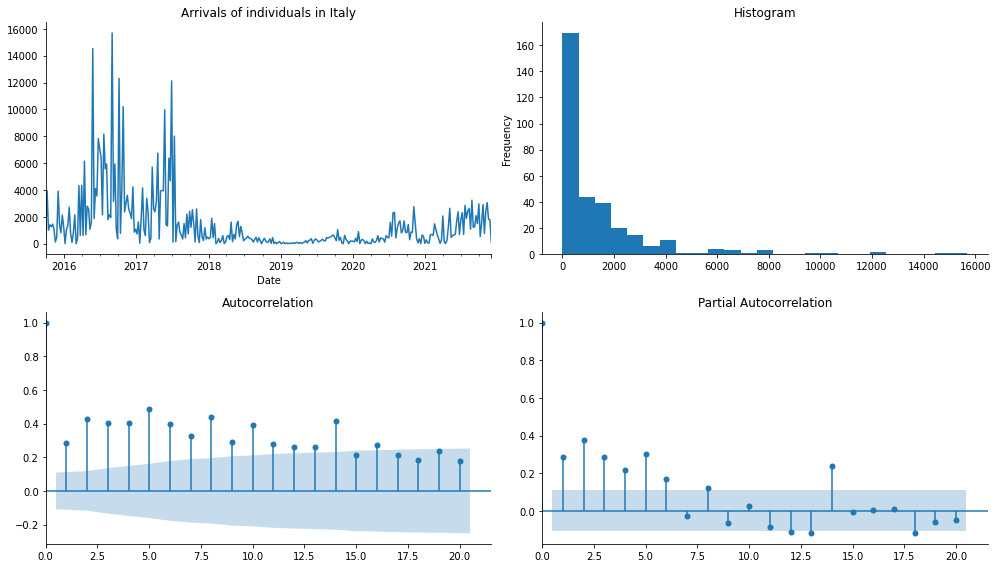

In [22]:
# Weekly
tsplot(ita_df_W, title="Arrivals of individuals in Italy",lags=20)

(<AxesSubplot:title={'center':'Arrivals of individuals in Italy'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:title={'center':'Partial Autocorrelation'}>)

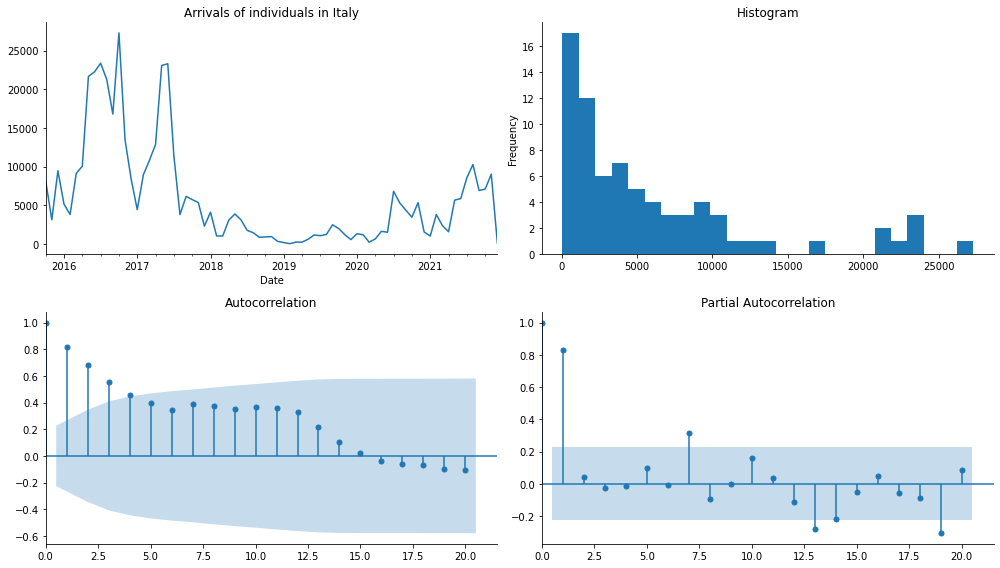

In [23]:
# Daily
tsplot(ita_df_M, title="Arrivals of individuals in Italy",lags=20)

(<AxesSubplot:title={'center':'Arrivals of individuals in Italy'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:title={'center':'Partial Autocorrelation'}>)

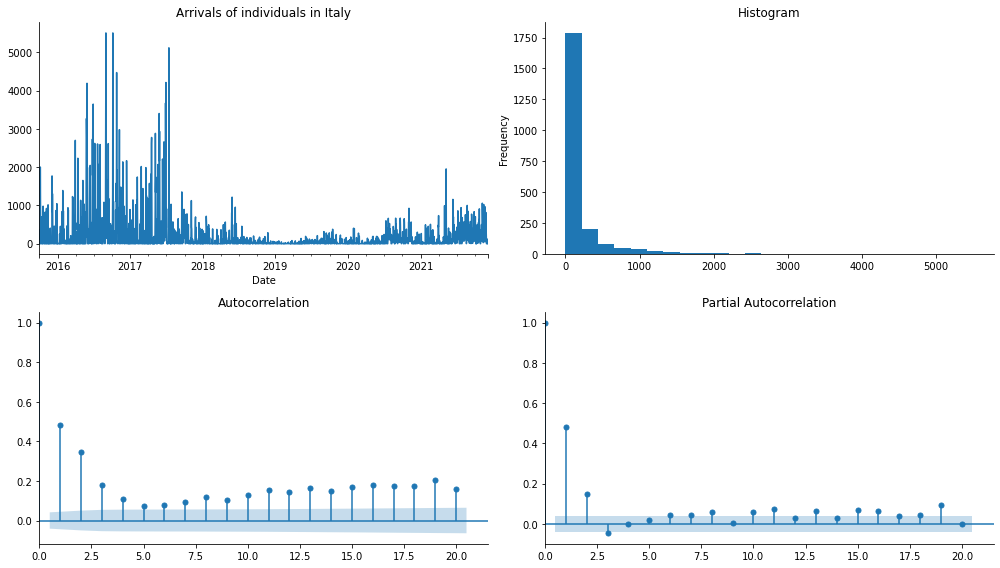

In [24]:
# Monthly
tsplot(ita_df_D, title="Arrivals of individuals in Italy",lags=20)

<AxesSubplot:xlabel='Date'>

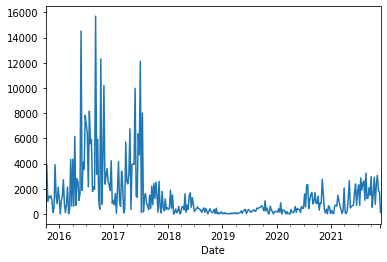

In [43]:
ita_df_W.plot()

# Autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

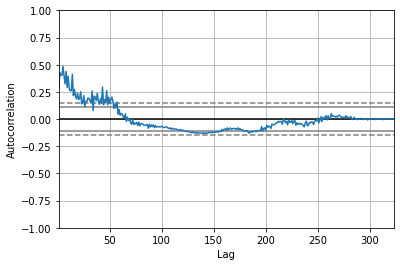

In [25]:
# Weekly
autocorrelation_plot(ita_df_W)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

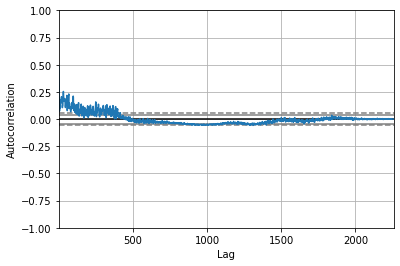

In [26]:
# Daily
autocorrelation_plot(ita_df_D)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

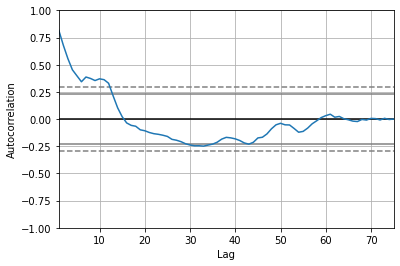

In [27]:
# Monthly
autocorrelation_plot(ita_df_M)

# Helper Functions

In [28]:
from pandas import DataFrame

## Persistence Model

In [29]:
def basis_modell_evaluate(data):
    values = DataFrame(data)
    dataframe = concat([values.shift(1), values], axis = 1)
    dataframe.columns = ["t", "t+1"]

    values = dataframe.values
    train_size = int(len(values)*0.8)
    train_persistence, test_persistence = values[1:train_size], X[train_size:]
    test_X_persistence, test_y_persistence = test_persistence[:,0] , test_persistence[:,1]
    # persistence Model
    def basis_modell(values):
        return values

    predictions = list()
    for values in test_X_persistence:
        predicted_value = basis_modell(values)
        p.append(predicted_value)
    rmse = sqrt(mean_squared_error(test_y_persistence, predictions))
    mae = mean_absolute_error(test_y_persistence, predictions)
    print("RMSE:" ,rmse, " MAE", mae)
    series_predicted = pd.Series(predictions, dtype='float64')
    test_series = pd.Series(test_y_persistence, dtype='float64')
  

    series_predicted.plot(color = "red", xlabel = "time", ylabel = "individuals")
    test_series.plot()

In [30]:
persistence_modell_evaluate(ita_df_W[:2])

NameError: name 'persistence_modell_evaluate' is not defined

RMSE: 286.9573370282354  MAE 168.99115044247787


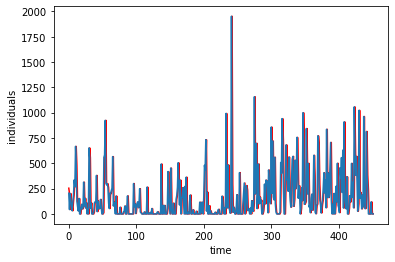

In [ ]:
persistence_modell_evaluate(ita_df_D[:])

RMSE: 5017.0  MAE 5017.0


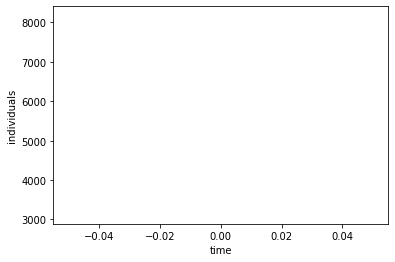

In [ ]:
persistence_modell_evaluate(ita_df_M[:2])

## Fit Model and Plot

In [ ]:
def fit_plot_evaluate(model, trainset, testset, exogen = None, eliminate_0 = True, onestep = None, horizon = None):

        if  exogen is not None:

            if  onestep is not None:
                fit = model.fit()
                predict = fit.forecast(steps = horizon, exog = exogen)
                mean_squared_Error = sqrt(mean_squared_error(testset["individuals"], predict))
                precentage_error = mean_absolute_percentage_error(testset["individuals"], predict)
                testset["individuals"].plot(ylabel= "individuals")
                predict.plot(color = 'red')
            else:
            
                fit = model.fit()
                predict = fit.predict(start=len(trainset), end=len(trainset)+len(testset)-1,exog = exogen, dynamic = False, type = 'levels')

            if eliminate_0 is True:
                predict = predict.apply(lambda x : x if x > 0 else 0)
            else:
                #experimentvis
                testset["individuals"].plot(ylabel = "individuals")
                predict.plot(color = 'red')
            mean_squared_Error = sqrt(mean_squared_error(testset["individuals"], predict))
            precentage_error = mean_absolute_percentage_error(testset["individuals"], predict)
            mean_abs_error = mean_absolute_error(testset["individuals"], predict)
            testset["individuals"].plot(ylabel = "individuals", legend = "individuals")
            predict.plot(color = 'red', legend = "predicted")
            
            
            
        else:
            fit = model.fit()
            predict = fit.predict(start=len(trainset), end=len(trainset)+len(testset)-1, dynamic = False)
            
            

            if eliminate_0 is True:
                predict = predict.apply(lambda x : x if x > 0 else 0)
                testset.plot(ylabel = "individuals")
                predict.plot(color = 'red',ylabel = "individuals")
            
            
            else:
                testset.plot(ylabel = "individuals")
                predict.plot(color = 'red',ylabel = "individuals")
            mean_squared_Error = sqrt(mean_squared_error(testset, predict))
            precentage_error = mean_absolute_percentage_error(testset, predict) 
            mean_abs_error = mean_absolute_error(testset, predict)
            
            

        
        return mean_squared_Error, precentage_error, mean_abs_error

# Rolling Forecast Function

In [ ]:
# Function for Rolling Forecast with Sarima
def rolling_forecast(traindata,test_data, Modell_order = None , Sarima_order = None, eliminate_0 = True, exogen= None, exogen_test=None):
    history = [x for x in traindata]
    #history_exogen = [x for x in exogen]
    predictions = list()
  
    for t in range(len(test_data)):
        Sarima_Modell_same = SARIMAX(history,order = Modell_order ,seasonal_order= Sarima_order)
        model_fit = Sarima_Modell_same.fit()
        output = model_fit.forecast(steps = 1)
        
        yhat = output[0]
        obs = test_data[t]
        predictions.append(yhat)
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    
    series_predicted = pd.Series(predictions, dtype='float64')
    series_predicted.index = test_data.index

    if eliminate_0 is True:
        # Eliminate 0 values --> (for differenced Time Series not applyable because of negativ values)
        series_predicted = series_predicted.apply(lambda x : x if x > 0 else 0)
        test_data.plot()
        series_predicted.plot(color = 'red')
        mean_squared_Error = sqrt(mean_squared_error(test_data, series_predicted))
        precentage_error = mean_absolute_percentage_error(test_data, series_predicted) 
    else:
        test_data.plot()
        series_predicted.plot(color = 'red')

    return mean_squared_Error, precentage_error

    #print(sqrt(mean_squared_error(test_data, series_predicted)))
    


In [ ]:
test_set_m

Date
2020-10-31     3477
2020-11-30     5360
2020-12-31     1570
2021-01-31     1040
2021-02-28     3824
2021-03-31     2386
2021-04-30     1596
2021-05-31     5680
2021-06-30     5884
2021-07-31     8578
2021-08-31    10286
2021-09-30     6919
2021-10-31     7110
2021-11-30     9026
2021-12-31      119
Freq: M, Name: individuals, dtype: int64

# Adding Weather Data

In [ ]:
#rolling_forecast(train_set_weekly_multi["individuals"],test_set_weekly_multi["individuals"], Modell_order= (2,1,1), Sarima_order= (0,0,1,12))

In [ ]:
#weather_ita = pd.read_csv("Tripoli_Weahter_Data.csv", sep = ",", dayfirst=True)
weather_ita = pd.read_csv("POWER_Point_Daily_20151001_20211205_032d8994N_013d2026E_LST.csv", sep = ",", dayfirst=True)
weather_ita["Date"] = pd.to_datetime((weather_ita.YEAR*10000+weather_ita.MO*100+weather_ita.DY).apply(str),format='%Y%m%d')
weather_ita = weather_ita.set_index("Date")
weather_ita = weather_ita.drop(["YEAR","MO","DY"], axis = 1)
weather_ita
weather_ita_daily = weather_ita
weather_ita_daily

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-01,25.33,19.51,22.42,26.04,5.24,28.17,22.93,101.45,4.28,7.16,0.60,6.55,151.31,5.02,8.65,0.70,7.95,152.19
2015-10-02,24.50,20.08,22.30,25.51,1.58,25.25,23.67,101.59,2.29,4.20,1.36,2.84,160.25,2.70,5.26,1.35,3.91,144.75
2015-10-03,24.78,21.23,23.00,25.83,3.32,26.73,23.41,101.84,4.38,6.30,3.34,2.95,75.69,5.03,7.39,3.97,3.42,76.81
2015-10-04,25.15,22.01,23.58,25.95,2.48,26.65,24.17,102.01,2.71,3.68,1.30,2.38,183.56,3.05,4.23,1.42,2.80,183.25
2015-10-05,25.48,19.43,22.45,26.02,3.30,27.17,23.87,101.83,2.05,3.09,0.68,2.41,253.69,2.25,3.32,0.79,2.53,254.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,16.79,8.17,12.48,19.12,2.64,18.18,15.53,102.20,3.56,5.00,1.48,3.52,265.75,3.92,5.23,1.70,3.53,266.31
2021-12-02,17.75,8.08,12.91,19.23,6.92,21.40,14.48,101.24,5.80,7.49,3.39,4.10,231.25,6.80,8.49,4.02,4.47,230.81
2021-12-03,16.01,9.08,12.54,18.82,3.57,18.07,14.50,100.93,9.07,10.98,6.66,4.31,266.00,10.62,12.62,8.04,4.58,266.88


In [ ]:
# Daily
weather_ita_daily = weather_ita
weather_ita_daily

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-01,25.33,19.51,22.42,26.04,5.24,28.17,22.93,101.45,4.28,7.16,0.60,6.55,151.31,5.02,8.65,0.70,7.95,152.19
2015-10-02,24.50,20.08,22.30,25.51,1.58,25.25,23.67,101.59,2.29,4.20,1.36,2.84,160.25,2.70,5.26,1.35,3.91,144.75
2015-10-03,24.78,21.23,23.00,25.83,3.32,26.73,23.41,101.84,4.38,6.30,3.34,2.95,75.69,5.03,7.39,3.97,3.42,76.81
2015-10-04,25.15,22.01,23.58,25.95,2.48,26.65,24.17,102.01,2.71,3.68,1.30,2.38,183.56,3.05,4.23,1.42,2.80,183.25
2015-10-05,25.48,19.43,22.45,26.02,3.30,27.17,23.87,101.83,2.05,3.09,0.68,2.41,253.69,2.25,3.32,0.79,2.53,254.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,16.79,8.17,12.48,19.12,2.64,18.18,15.53,102.20,3.56,5.00,1.48,3.52,265.75,3.92,5.23,1.70,3.53,266.31
2021-12-02,17.75,8.08,12.91,19.23,6.92,21.40,14.48,101.24,5.80,7.49,3.39,4.10,231.25,6.80,8.49,4.02,4.47,230.81
2021-12-03,16.01,9.08,12.54,18.82,3.57,18.07,14.50,100.93,9.07,10.98,6.66,4.31,266.00,10.62,12.62,8.04,4.58,266.88


In [ ]:
# Weekly
weather_ita_weekly=weather_ita.resample("W").mean()
weather_ita_weekly

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-04,24.940000,20.707500,22.825000,25.832500,3.155000,26.700000,23.545000,101.722500,3.415000,5.335000,1.650000,3.680000,142.702500,3.950000,6.382500,1.860000,4.520000,139.250000
2015-10-11,25.885714,19.757143,22.821429,26.025714,4.335714,28.368571,24.031429,101.134286,4.458571,6.805714,2.138571,4.670000,203.731429,5.361429,8.341429,2.417143,5.925714,204.197143
2015-10-18,25.215714,19.607143,22.410000,25.705714,4.342857,27.615714,23.272857,101.238571,3.888571,5.818571,1.500000,4.322857,150.401429,4.647143,7.072857,1.707143,5.365714,152.722857
2015-10-25,23.492857,17.664286,20.580000,24.511429,3.121429,25.144286,22.021429,101.232857,6.435714,8.564286,4.691429,3.875714,244.132857,7.614286,10.364286,5.501429,4.862857,244.304286
2015-11-01,22.417143,15.727143,19.071429,23.565714,2.847143,23.917143,21.067143,101.551429,3.797143,5.378571,2.170000,3.211429,189.962857,4.358571,6.221429,2.510000,3.714286,191.895714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,24.351429,14.838571,19.595714,23.990000,5.398571,27.467143,22.065714,101.030000,4.632857,6.664286,1.724286,4.935714,211.161429,5.774286,8.370000,1.935714,6.435714,210.812857
2021-11-14,20.590000,13.997143,17.295714,22.294286,2.564286,21.898571,19.337143,101.367143,4.292857,6.107143,2.241429,3.867143,228.304286,4.885714,7.037143,2.544286,4.488571,228.471429
2021-11-21,20.368571,12.380000,16.372857,21.655714,3.638571,22.264286,18.624286,101.598571,4.104286,5.472857,1.844286,3.632857,148.885714,4.744286,6.478571,2.110000,4.371429,149.122857


In [ ]:
# Monthly
weather_ita_monthly=weather_ita.resample("M").mean()
weather_ita_monthly

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-31,24.435484,18.599677,21.517419,25.128387,3.618387,26.420645,22.801290,101.332258,4.460000,6.472903,2.485806,3.989355,187.575806,5.267097,7.795806,2.865484,4.930968,188.240645
2015-11-30,19.691000,14.635667,17.163667,21.407000,2.341000,20.938667,18.597333,101.903667,5.076333,6.385333,3.534000,2.850667,236.727333,5.951333,7.504000,4.179000,3.325333,237.057333
2015-12-31,16.314839,11.097742,13.706774,17.777419,2.137097,17.437419,15.298065,102.794516,3.819677,4.844516,2.456774,2.390645,242.118387,4.414194,5.732258,2.834839,2.897742,242.389032
2016-01-31,14.844194,9.155161,12.000323,16.043871,3.546452,16.750645,13.204194,102.080000,5.791935,7.621290,3.571290,4.050968,254.259355,6.879032,9.073871,4.448065,4.626129,254.697742
2016-02-29,15.257586,9.803103,12.529655,15.643103,4.157931,17.481379,13.325172,101.784138,5.311379,7.427586,2.830000,4.597586,251.960345,6.464828,9.012069,3.503793,5.508621,252.827931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,29.804194,21.152258,25.478065,29.924516,5.930968,32.984516,27.054516,101.189677,4.302581,6.271290,2.239677,4.031290,112.140968,5.269032,7.704516,2.660645,5.044516,112.576452
2021-09-30,27.888000,20.151667,24.020000,28.445667,5.028333,30.699333,25.670333,101.423000,4.858333,7.013333,2.376000,4.635667,160.994333,5.772333,8.254000,2.854667,5.399000,162.623667
2021-10-31,23.794839,16.395484,20.093548,25.062581,3.657742,25.803871,22.145806,101.496774,5.038710,7.054194,2.550323,4.502903,217.207742,5.853548,8.120645,3.055161,5.065806,216.892903


## Adjusted Weatherdata

In [ ]:
# weekly
weather_ita_weekly_adjusted = weather_ita_weekly["2015-10-01":"2021-12-05"] 
weather_ita_weekly_adjusted

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-04,24.940000,20.707500,22.825000,25.832500,3.155000,26.700000,23.545000,101.722500,3.415000,5.335000,1.650000,3.680000,142.702500,3.950000,6.382500,1.860000,4.520000,139.250000
2015-10-11,25.885714,19.757143,22.821429,26.025714,4.335714,28.368571,24.031429,101.134286,4.458571,6.805714,2.138571,4.670000,203.731429,5.361429,8.341429,2.417143,5.925714,204.197143
2015-10-18,25.215714,19.607143,22.410000,25.705714,4.342857,27.615714,23.272857,101.238571,3.888571,5.818571,1.500000,4.322857,150.401429,4.647143,7.072857,1.707143,5.365714,152.722857
2015-10-25,23.492857,17.664286,20.580000,24.511429,3.121429,25.144286,22.021429,101.232857,6.435714,8.564286,4.691429,3.875714,244.132857,7.614286,10.364286,5.501429,4.862857,244.304286
2015-11-01,22.417143,15.727143,19.071429,23.565714,2.847143,23.917143,21.067143,101.551429,3.797143,5.378571,2.170000,3.211429,189.962857,4.358571,6.221429,2.510000,3.714286,191.895714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,24.351429,14.838571,19.595714,23.990000,5.398571,27.467143,22.065714,101.030000,4.632857,6.664286,1.724286,4.935714,211.161429,5.774286,8.370000,1.935714,6.435714,210.812857
2021-11-14,20.590000,13.997143,17.295714,22.294286,2.564286,21.898571,19.337143,101.367143,4.292857,6.107143,2.241429,3.867143,228.304286,4.885714,7.037143,2.544286,4.488571,228.471429
2021-11-21,20.368571,12.380000,16.372857,21.655714,3.638571,22.264286,18.624286,101.598571,4.104286,5.472857,1.844286,3.632857,148.885714,4.744286,6.478571,2.110000,4.371429,149.122857


In [ ]:
# daily
weather_ita_daily_adjusted = weather_ita_daily["2015-10-01":"2021-12-05"] 
weather_ita_daily_adjusted

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-01,25.33,19.51,22.42,26.04,5.24,28.17,22.93,101.45,4.28,7.16,0.60,6.55,151.31,5.02,8.65,0.70,7.95,152.19
2015-10-02,24.50,20.08,22.30,25.51,1.58,25.25,23.67,101.59,2.29,4.20,1.36,2.84,160.25,2.70,5.26,1.35,3.91,144.75
2015-10-03,24.78,21.23,23.00,25.83,3.32,26.73,23.41,101.84,4.38,6.30,3.34,2.95,75.69,5.03,7.39,3.97,3.42,76.81
2015-10-04,25.15,22.01,23.58,25.95,2.48,26.65,24.17,102.01,2.71,3.68,1.30,2.38,183.56,3.05,4.23,1.42,2.80,183.25
2015-10-05,25.48,19.43,22.45,26.02,3.30,27.17,23.87,101.83,2.05,3.09,0.68,2.41,253.69,2.25,3.32,0.79,2.53,254.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,16.79,8.17,12.48,19.12,2.64,18.18,15.53,102.20,3.56,5.00,1.48,3.52,265.75,3.92,5.23,1.70,3.53,266.31
2021-12-02,17.75,8.08,12.91,19.23,6.92,21.40,14.48,101.24,5.80,7.49,3.39,4.10,231.25,6.80,8.49,4.02,4.47,230.81
2021-12-03,16.01,9.08,12.54,18.82,3.57,18.07,14.50,100.93,9.07,10.98,6.66,4.31,266.00,10.62,12.62,8.04,4.58,266.88


In [ ]:
# Monthly
weather_ita_monthly_adjusted = weather_ita_monthly["2015-10-01":"2021-12-05"] 
weather_ita_monthly_adjusted

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-31,24.435484,18.599677,21.517419,25.128387,3.618387,26.420645,22.801290,101.332258,4.460000,6.472903,2.485806,3.989355,187.575806,5.267097,7.795806,2.865484,4.930968,188.240645
2015-11-30,19.691000,14.635667,17.163667,21.407000,2.341000,20.938667,18.597333,101.903667,5.076333,6.385333,3.534000,2.850667,236.727333,5.951333,7.504000,4.179000,3.325333,237.057333
2015-12-31,16.314839,11.097742,13.706774,17.777419,2.137097,17.437419,15.298065,102.794516,3.819677,4.844516,2.456774,2.390645,242.118387,4.414194,5.732258,2.834839,2.897742,242.389032
2016-01-31,14.844194,9.155161,12.000323,16.043871,3.546452,16.750645,13.204194,102.080000,5.791935,7.621290,3.571290,4.050968,254.259355,6.879032,9.073871,4.448065,4.626129,254.697742
2016-02-29,15.257586,9.803103,12.529655,15.643103,4.157931,17.481379,13.325172,101.784138,5.311379,7.427586,2.830000,4.597586,251.960345,6.464828,9.012069,3.503793,5.508621,252.827931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,27.743548,20.028065,23.885806,28.186452,5.321935,30.542581,25.220000,101.207419,4.230323,6.377742,1.784516,4.594194,154.288387,5.131290,7.789677,2.205806,5.584839,154.564839
2021-08-31,29.804194,21.152258,25.478065,29.924516,5.930968,32.984516,27.054516,101.189677,4.302581,6.271290,2.239677,4.031290,112.140968,5.269032,7.704516,2.660645,5.044516,112.576452
2021-09-30,27.888000,20.151667,24.020000,28.445667,5.028333,30.699333,25.670333,101.423000,4.858333,7.013333,2.376000,4.635667,160.994333,5.772333,8.254000,2.854667,5.399000,162.623667


# Scaling the exogen Variables

In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = weather_ita_weekly_adjusted.columns
weather_ita_weekly_adjusted[:]= scaler.fit_transform(weather_ita_weekly_adjusted)
weather_ita_weekly_adjusted  = pd.DataFrame(weather_ita_weekly_adjusted, columns=names)
weather_ita_weekly_adjusted

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-04,0.656862,0.877487,0.808929,0.721467,0.156774,0.546582,0.768094,0.470269,0.110282,0.211842,0.117011,0.368546,0.288239,0.113896,0.230589,0.113369,0.315418,0.270130
2015-10-11,0.707703,0.823467,0.808718,0.733065,0.288655,0.619368,0.795815,0.229057,0.259608,0.403235,0.185534,0.552025,0.546535,0.280114,0.441000,0.175294,0.508435,0.545413
2015-10-18,0.671684,0.814941,0.784342,0.713857,0.289453,0.586527,0.752585,0.271822,0.178046,0.274772,0.095973,0.487689,0.320824,0.195996,0.304741,0.096380,0.431542,0.327236
2015-10-25,0.579065,0.704507,0.675920,0.642171,0.153024,0.478719,0.681267,0.269479,0.542518,0.632088,0.543578,0.404819,0.717527,0.545424,0.658278,0.518101,0.362495,0.715410
2015-11-01,0.521235,0.594397,0.586543,0.585406,0.122387,0.425189,0.626883,0.400117,0.164963,0.217513,0.189942,0.281705,0.488261,0.162012,0.213288,0.185614,0.204786,0.493273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,0.625221,0.543890,0.617605,0.610873,0.407372,0.580046,0.683791,0.186292,0.284546,0.384830,0.127429,0.601271,0.577981,0.328735,0.444069,0.121785,0.578462,0.573454
2021-11-14,0.423009,0.496062,0.481337,0.509089,0.090793,0.337135,0.528291,0.324546,0.235895,0.312326,0.199960,0.403230,0.650535,0.224092,0.300905,0.189425,0.311102,0.648302
2021-11-21,0.411105,0.404141,0.426661,0.470760,0.210787,0.353088,0.487666,0.419449,0.208913,0.229782,0.144260,0.359809,0.314409,0.207436,0.240908,0.141156,0.295018,0.311977


In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = weather_ita_monthly_adjusted.columns
weather_ita_monthly_adjusted[:]= scaler.fit_transform(weather_ita_monthly_adjusted)
weather_ita_monthly_adjusted  = pd.DataFrame(weather_ita_monthly_adjusted, columns=names)
weather_ita_monthly_adjusted

C:\Users\hornd\AppData\Local\Temp/ipykernel_12292/451141688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_ita_monthly_adjusted[:]= scaler.fit_transform(weather_ita_monthly_adjusted)
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-31,0.675724,0.824062,0.744118,0.695716,0.300531,0.632758,0.726522,0.218314,0.180694,0.325930,0.255640,0.496543,0.460381,0.208135,0.348743,0.234954,0.481108,0.459704
2015-11-30,0.389152,0.550840,0.462838,0.459618,0.041369,0.326048,0.456213,0.523774,0.335163,0.308402,0.525166,0.142878,0.760355,0.348422,0.299428,0.511541,0.101178,0.756294
2015-12-31,0.185228,0.306986,0.239501,0.229344,0.000000,0.130157,0.244073,1.000000,0.020212,0.000000,0.248175,0.000000,0.793257,0.033267,0.000000,0.228502,0.000000,0.788687
2016-01-31,0.096399,0.173092,0.129254,0.119361,0.285937,0.091732,0.109440,0.618038,0.514512,0.555785,0.534754,0.515680,0.867353,0.538624,0.564739,0.568197,0.408976,0.863470
2016-02-29,0.121368,0.217752,0.163452,0.093935,0.409997,0.132616,0.117219,0.459877,0.394072,0.517014,0.344144,0.685454,0.853323,0.453701,0.554294,0.369363,0.617794,0.852110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.875535,0.922514,0.897130,0.889731,0.646156,0.863376,0.882043,0.151578,0.123130,0.306883,0.075315,0.684400,0.257227,0.180291,0.347708,0.096047,0.635829,0.255104
2021-08-31,1.000000,1.000000,1.000000,1.000000,0.769719,1.000000,1.000000,0.142093,0.141240,0.285576,0.192352,0.509568,0.000000,0.208532,0.333315,0.191822,0.507976,0.000000
2021-09-30,0.884260,0.931034,0.905800,0.906176,0.586588,0.872146,0.910999,0.266822,0.280527,0.434100,0.227405,0.697282,0.298154,0.311722,0.426179,0.232677,0.591856,0.304066


In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = weather_ita_daily_adjusted.columns
weather_ita_daily_adjusted[:]= scaler.fit_transform(weather_ita_daily_adjusted)
weather_ita_daily_adjusted  = pd.DataFrame(weather_ita_daily_adjusted, columns=names)
weather_ita_daily_adjusted

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
Date,,,,,,,,,,,,,,,,,,
2015-10-01,0.636405,0.779438,0.780186,0.714930,0.355869,0.569968,0.674951,0.519894,0.256390,0.374302,0.049700,0.471068,0.428617,0.258517,0.390736,0.046628,0.491964,0.416957
2015-10-02,0.598540,0.805254,0.773994,0.685070,0.083952,0.467043,0.711014,0.557029,0.097444,0.167598,0.114824,0.168704,0.454596,0.103540,0.189430,0.093257,0.209644,0.394769
2015-10-03,0.611314,0.857337,0.810114,0.703099,0.213224,0.519210,0.698343,0.623342,0.264377,0.314246,0.284490,0.177669,0.208875,0.259185,0.315914,0.281205,0.175402,0.192151
2015-10-04,0.628193,0.892663,0.840041,0.709859,0.150817,0.516391,0.735380,0.668435,0.130990,0.131285,0.109683,0.131214,0.522332,0.126921,0.128266,0.098278,0.132075,0.509588
2015-10-05,0.643248,0.775815,0.781734,0.713803,0.211738,0.534720,0.720760,0.620690,0.078275,0.090084,0.056555,0.133659,0.726121,0.073480,0.074228,0.053085,0.113208,0.722257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.246807,0.265851,0.267286,0.325070,0.162704,0.217836,0.314327,0.718833,0.198882,0.223464,0.125107,0.224124,0.761166,0.185037,0.187648,0.118364,0.183089,0.757299
2021-12-02,0.290602,0.261775,0.289474,0.331268,0.480684,0.331336,0.263158,0.464191,0.377796,0.397346,0.288775,0.271394,0.660913,0.377422,0.381235,0.284792,0.248777,0.651427
2021-12-03,0.211223,0.307065,0.270382,0.308169,0.231798,0.213958,0.264133,0.381963,0.638978,0.641061,0.568980,0.288509,0.761892,0.632599,0.626485,0.573171,0.256464,0.758999


In [ ]:
combined_df_w = weather_ita_weekly_adjusted.merge(ita_df_W, left_index=True, right_index=True)
combined_df_w

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,individuals
Date,,,,,,,,,,,,,,,,,,,
2015-10-04,0.656862,0.877487,0.808929,0.721467,0.156774,0.546582,0.768094,0.470269,0.110282,0.211842,0.117011,0.368546,0.288239,0.113896,0.230589,0.113369,0.315418,0.270130,533
2015-10-11,0.707703,0.823467,0.808718,0.733065,0.288655,0.619368,0.795815,0.229057,0.259608,0.403235,0.185534,0.552025,0.546535,0.280114,0.441000,0.175294,0.508435,0.545413,3954
2015-10-18,0.671684,0.814941,0.784342,0.713857,0.289453,0.586527,0.752585,0.271822,0.178046,0.274772,0.095973,0.487689,0.320824,0.195996,0.304741,0.096380,0.431542,0.327236,1007
2015-10-25,0.579065,0.704507,0.675920,0.642171,0.153024,0.478719,0.681267,0.269479,0.542518,0.632088,0.543578,0.404819,0.717527,0.545424,0.658278,0.518101,0.362495,0.715410,1399
2015-11-01,0.521235,0.594397,0.586543,0.585406,0.122387,0.425189,0.626883,0.400117,0.164963,0.217513,0.189942,0.281705,0.488261,0.162012,0.213288,0.185614,0.204786,0.493273,1265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,0.625221,0.543890,0.617605,0.610873,0.407372,0.580046,0.683791,0.186292,0.284546,0.384830,0.127429,0.601271,0.577981,0.328735,0.444069,0.121785,0.578462,0.573454,2380
2021-11-14,0.423009,0.496062,0.481337,0.509089,0.090793,0.337135,0.528291,0.324546,0.235895,0.312326,0.199960,0.403230,0.650535,0.224092,0.300905,0.189425,0.311102,0.648302,3058
2021-11-21,0.411105,0.404141,0.426661,0.470760,0.210787,0.353088,0.487666,0.419449,0.208913,0.229782,0.144260,0.359809,0.314409,0.207436,0.240908,0.141156,0.295018,0.311977,1814


# Combining Weather Data and Daily Arrival Data

In [ ]:
# Weekly
combined_df_w = weather_ita_weekly_adjusted.merge(ita_df_W, left_index=True, right_index=True)
combined_df_w

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,individuals
Date,,,,,,,,,,,,,,,,,,,
2015-10-04,0.656862,0.877487,0.808929,0.721467,0.156774,0.546582,0.768094,0.470269,0.110282,0.211842,0.117011,0.368546,0.288239,0.113896,0.230589,0.113369,0.315418,0.270130,533
2015-10-11,0.707703,0.823467,0.808718,0.733065,0.288655,0.619368,0.795815,0.229057,0.259608,0.403235,0.185534,0.552025,0.546535,0.280114,0.441000,0.175294,0.508435,0.545413,3954
2015-10-18,0.671684,0.814941,0.784342,0.713857,0.289453,0.586527,0.752585,0.271822,0.178046,0.274772,0.095973,0.487689,0.320824,0.195996,0.304741,0.096380,0.431542,0.327236,1007
2015-10-25,0.579065,0.704507,0.675920,0.642171,0.153024,0.478719,0.681267,0.269479,0.542518,0.632088,0.543578,0.404819,0.717527,0.545424,0.658278,0.518101,0.362495,0.715410,1399
2015-11-01,0.521235,0.594397,0.586543,0.585406,0.122387,0.425189,0.626883,0.400117,0.164963,0.217513,0.189942,0.281705,0.488261,0.162012,0.213288,0.185614,0.204786,0.493273,1265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,0.625221,0.543890,0.617605,0.610873,0.407372,0.580046,0.683791,0.186292,0.284546,0.384830,0.127429,0.601271,0.577981,0.328735,0.444069,0.121785,0.578462,0.573454,2380
2021-11-14,0.423009,0.496062,0.481337,0.509089,0.090793,0.337135,0.528291,0.324546,0.235895,0.312326,0.199960,0.403230,0.650535,0.224092,0.300905,0.189425,0.311102,0.648302,3058
2021-11-21,0.411105,0.404141,0.426661,0.470760,0.210787,0.353088,0.487666,0.419449,0.208913,0.229782,0.144260,0.359809,0.314409,0.207436,0.240908,0.141156,0.295018,0.311977,1814


In [ ]:
#combined_df_w["individuals"]= scaler.fit_transform(combined_df_w)

In [ ]:
# Daily
combined_df_d = weather_ita_daily_adjusted.merge(ita_df_D, left_index=True, right_index=True)
combined_df_d

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,individuals
Date,,,,,,,,,,,,,,,,,,,
2015-10-01,0.636405,0.779438,0.780186,0.714930,0.355869,0.569968,0.674951,0.519894,0.256390,0.374302,0.049700,0.471068,0.428617,0.258517,0.390736,0.046628,0.491964,0.416957,343
2015-10-02,0.598540,0.805254,0.773994,0.685070,0.083952,0.467043,0.711014,0.557029,0.097444,0.167598,0.114824,0.168704,0.454596,0.103540,0.189430,0.093257,0.209644,0.394769,0
2015-10-03,0.611314,0.857337,0.810114,0.703099,0.213224,0.519210,0.698343,0.623342,0.264377,0.314246,0.284490,0.177669,0.208875,0.259185,0.315914,0.281205,0.175402,0.192151,128
2015-10-04,0.628193,0.892663,0.840041,0.709859,0.150817,0.516391,0.735380,0.668435,0.130990,0.131285,0.109683,0.131214,0.522332,0.126921,0.128266,0.098278,0.132075,0.509588,62
2015-10-05,0.643248,0.775815,0.781734,0.713803,0.211738,0.534720,0.720760,0.620690,0.078275,0.090084,0.056555,0.133659,0.726121,0.073480,0.074228,0.053085,0.113208,0.722257,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.246807,0.265851,0.267286,0.325070,0.162704,0.217836,0.314327,0.718833,0.198882,0.223464,0.125107,0.224124,0.761166,0.185037,0.187648,0.118364,0.183089,0.757299,0
2021-12-02,0.290602,0.261775,0.289474,0.331268,0.480684,0.331336,0.263158,0.464191,0.377796,0.397346,0.288775,0.271394,0.660913,0.377422,0.381235,0.284792,0.248777,0.651427,119
2021-12-03,0.211223,0.307065,0.270382,0.308169,0.231798,0.213958,0.264133,0.381963,0.638978,0.641061,0.568980,0.288509,0.761892,0.632599,0.626485,0.573171,0.256464,0.758999,0


In [ ]:
# Monthly
combined_df_m = weather_ita_monthly_adjusted.merge(ita_df_M, left_index=True, right_index=True)
combined_df_m

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,individuals
Date,,,,,,,,,,,,,,,,,,,
2015-10-31,0.675724,0.824062,0.744118,0.695716,0.300531,0.632758,0.726522,0.218314,0.180694,0.325930,0.255640,0.496543,0.460381,0.208135,0.348743,0.234954,0.481108,0.459704,8158
2015-11-30,0.389152,0.550840,0.462838,0.459618,0.041369,0.326048,0.456213,0.523774,0.335163,0.308402,0.525166,0.142878,0.760355,0.348422,0.299428,0.511541,0.101178,0.756294,3141
2015-12-31,0.185228,0.306986,0.239501,0.229344,0.000000,0.130157,0.244073,1.000000,0.020212,0.000000,0.248175,0.000000,0.793257,0.033267,0.000000,0.228502,0.000000,0.788687,9476
2016-01-31,0.096399,0.173092,0.129254,0.119361,0.285937,0.091732,0.109440,0.618038,0.514512,0.555785,0.534754,0.515680,0.867353,0.538624,0.564739,0.568197,0.408976,0.863470,5156
2016-02-29,0.121368,0.217752,0.163452,0.093935,0.409997,0.132616,0.117219,0.459877,0.394072,0.517014,0.344144,0.685454,0.853323,0.453701,0.554294,0.369363,0.617794,0.852110,3821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.875535,0.922514,0.897130,0.889731,0.646156,0.863376,0.882043,0.151578,0.123130,0.306883,0.075315,0.684400,0.257227,0.180291,0.347708,0.096047,0.635829,0.255104,8578
2021-08-31,1.000000,1.000000,1.000000,1.000000,0.769719,1.000000,1.000000,0.142093,0.141240,0.285576,0.192352,0.509568,0.000000,0.208532,0.333315,0.191822,0.507976,0.000000,10286
2021-09-30,0.884260,0.931034,0.905800,0.906176,0.586588,0.872146,0.910999,0.266822,0.280527,0.434100,0.227405,0.697282,0.298154,0.311722,0.426179,0.232677,0.591856,0.304066,6919


# Correlation Analysis

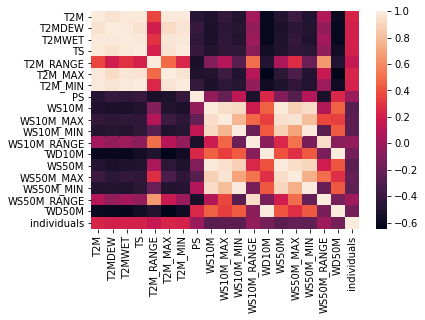

In [ ]:
corr_w = combined_df_w.corr()
sns.heatmap(corr_w, 
            xticklabels=corr_w.columns.values,
            yticklabels=corr_w.columns.values)
plt.show()

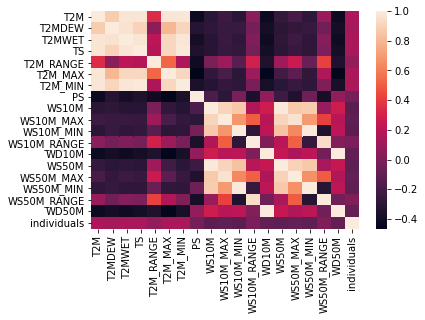

In [ ]:
corr_d = combined_df_d.corr()
sns.heatmap(corr_d, 
            xticklabels=corr_d.columns.values,
            yticklabels=corr_d.columns.values)
plt.show()

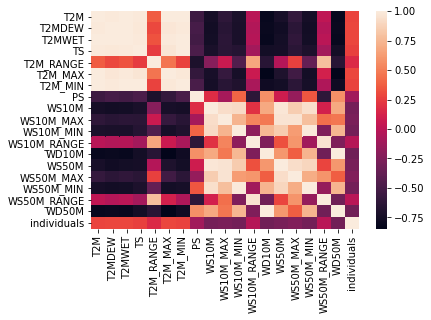

In [ ]:
corr_m = combined_df_m.corr()
sns.heatmap(corr_m, 
            xticklabels=corr_m.columns.values,
            yticklabels=corr_m.columns.values)
plt.show()

# Train Test Split the new Data Set with weather Data

In [ ]:
train_set_weekly_multi, test_set_weekly_multi= np.split(combined_df_w, [int(.80 *len(combined_df_w))])
train_set_daily_multi, test_set_daily_multi= np.split(combined_df_d, [int(.80 *len(combined_df_d))])
train_set_monthly_multi, test_set_monthly_multi= np.split(combined_df_m, [int(.80 *len(combined_df_m))])

# Cointegration Test

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

#cointegration_test(two_feautre_df[["individuals","WS50M_MAX","WS50M_RANGE"]])
cointegration_test(train_set_monthly_multi)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
T2M    ::  5010.63   > nan       =>   False
T2MDEW ::  4251.97   > nan       =>   False
T2MWET ::  3592.17   > nan       =>   False
TS     ::  3007.71   > nan       =>   False
T2M_RANGE ::  2502.74   > nan       =>   False
T2M_MAX ::  2055.57   > nan       =>   False
T2M_MIN ::  1664.81   > nan       =>   False
PS     ::  1283.11   > 311.1288  =>   True
WS10M  ::  944.32    > 263.2603  =>   True
WS10M_MAX ::  674.02    > 219.4051  =>   True
WS10M_MIN ::  457.63    > 179.5199  =>   True
WS10M_RANGE ::  324.19    > 143.6691  =>   True
WD10M  ::  214.41    > 111.7797  =>   True
WS50M  ::  134.96    > 83.9383   =>   True
WS50M_MAX ::  63.07     > 60.0627   =>   True
WS50M_MIN ::  16.85     > 40.1749   =>   False
WS50M_RANGE ::  6.56      > 24.2761   =>   False
WD50M  ::  1.84      > 12.3212   =>   False
individuals ::  0.64      > 4.1296    =>   False


C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:577: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn("Critical values are only available for time series "


# Define the Exogen and Endogen Variables

In [ ]:
# Weekly
exog_data_weekly = train_set_weekly_multi.loc[:,"PS":"WS50M_MIN"]
exog_test_data_weekly = test_set_weekly_multi.loc[:,"PS":"WS50M_MIN"]

# Daily
exog_data_daily = train_set_daily_multi.loc[:,"PS":"WS50M_MIN"]
exog_test_data_daily = test_set_daily_multi.loc[:,"PS":"WS50M_MIN"]

# Monthly
exog_data_monthly = train_set_monthly_multi.loc[:,"PS":"WS50M_MIN"]
exog_test_data_monthly = test_set_monthly_multi.loc[:,"PS":"WS50M_MIN"]



In [ ]:
exog_data_monthly

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN
Date,,,,,,,,,
2015-10-31,0.218314,0.180694,0.325930,0.255640,0.496543,0.460381,0.208135,0.348743,0.234954
2015-11-30,0.523774,0.335163,0.308402,0.525166,0.142878,0.760355,0.348422,0.299428,0.511541
2015-12-31,1.000000,0.020212,0.000000,0.248175,0.000000,0.793257,0.033267,0.000000,0.228502
2016-01-31,0.618038,0.514512,0.555785,0.534754,0.515680,0.867353,0.538624,0.564739,0.568197
2016-02-29,0.459877,0.394072,0.517014,0.344144,0.685454,0.853323,0.453701,0.554294,0.369363
2016-03-31,0.171754,0.435282,0.569925,0.328550,0.785392,0.594497,0.522950,0.646623,0.383576
2016-04-30,0.037667,0.454712,0.659541,0.447512,0.781658,0.353571,0.587004,0.789138,0.515261
2016-05-31,0.165891,0.337699,0.539256,0.189449,0.906422,0.385143,0.437765,0.621927,0.222660
2016-06-30,0.147433,0.201663,0.414818,0.135437,0.778967,0.263527,0.286299,0.488428,0.148238


# Auto_Arima

In [ ]:
# weekly
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_set_monthly_multi["individuals"], 
 exogenous= exog_data_monthly,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 seasonal = True,
 error_action="ignore", 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1143.252, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1141.862, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1142.437, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1142.565, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1139.906, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.258 seconds


In [ ]:
# Monthly
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_set_monthly_multi["individuals"], 
 exogenous= exog_data_monthly,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 seasonal = True,
 error_action="ignore", 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1143.252, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1141.862, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1142.437, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1142.565, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1139.906, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.163 seconds


In [ ]:
# Daily
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_set_daily_multi["individuals"][:226], 
 exogenous= exog_data_daily[:226],
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 seasonal = True,
 error_action="ignore", 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3471.679, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3444.955, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3469.691, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3430.502, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3428.857, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3418.069, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3414.538, Time=0.24 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=3411.853, Time=0.61 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=3407.646, Time=0.67 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=3381.903, Time=0.79 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=3383.167, Time=0.69 sec
 ARIMA(7,1,2)(0,0,0)[0] intercept   : AIC=3384.355, Time=0.83 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=i

# Multivariate Forecasting with SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
test_set_weekly_multi.shape

(65, 19)

(556.4159634631741, 5.781648016791162, 466.7445699818863)

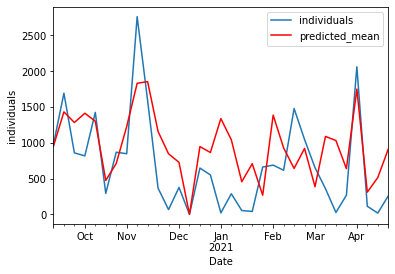

In [ ]:
# Weekly
#multivariate = SARIMAX(endog = train_set_weekly_multi["individuals"], exog = exog_data_weekly, order = (3,1,0),seasonal_order=(1,2,2,12), trend= "n", mle_regression = False, enforce_stationarity = False, freq='w')
multivariate_w = SARIMAX(endog = train_set_weekly_multi["individuals"], exog = exog_data_weekly, order = (1,1,1),seasonal_order=(0,0,1,12), trend= "n", mle_regression = False, enforce_stationarity = False, freq='w')
multivariate_fit_w = multivariate_w.fit(disp=False)
multivariate_fit_w.summary()

# Function for out of sample forecasting
#fit_plot_evaluate(multivariate_w,train_set_weekly_multi["individuals"], test_set_weekly_multi, exogen = exog_test_data_weekly)
fit_plot_evaluate(multivariate_w,train_set_weekly_multi["individuals"], test_set_weekly_multi[:33], exogen= exog_test_data_weekly[:33])

993.5185925462376


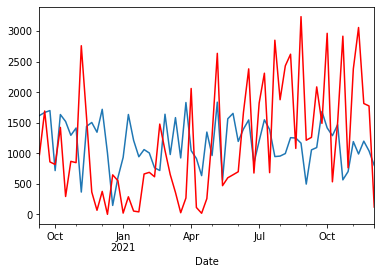

In [ ]:
i = 65
test=multivariate_fit_w.forecast(exog= exog_data_weekly[:i], steps = i)
test[:i].plot()
test_set_weekly_multi["individuals"][:i].plot(color= "red")

print(sqrt(mean_squared_error(test[:i],test_set_weekly_multi["individuals"][:i])))


In [ ]:
test_set_daily_multi.shape

(452, 19)

C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(255.95782930917215, 1.9069838975976627e+17, 180.76705806830753)

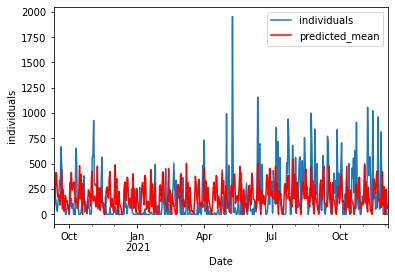

In [ ]:
# Daily
multivariate_d = SARIMAX(endog = train_set_daily_multi["individuals"], exog = exog_data_daily, order = (7,1,1),seasonal_order=(1,1,0,24), trend= "n", mle_regression = False, enforce_stationarity = False)
multivariate_fit_d = multivariate_d.fit(disp=False)
multivariate_fit_d.summary()
fit_plot_evaluate(multivariate_d,train_set_daily_multi["individuals"], test_set_daily_multi[:], exogen= exog_test_data_daily[:])

#fit_plot_evaluate(multivariate_d,train_set_daily_multi["individuals"], test_set_daily_multi[:8], exogen= exog_test_data_daily[:8], onestep=True,horizon=8)


In [ ]:
test_set_monthly_multi.shape

(15, 19)

(963.0230815482232, 0.4239294329194403, 847.552962541105)

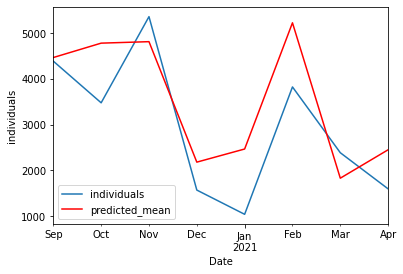

In [ ]:
#Monthly
multivariate_m = SARIMAX(endog = train_set_monthly_multi["individuals"], exog = exog_data_monthly, order = (8,1,1),seasonal_order=(0,1,0,12), trend= "n", mle_regression = False, enforce_stationarity = False)
multivariate_fit_m = multivariate_m.fit(disp=False)
multivariate_fit_m.summary()
#fit_plot_evaluate(multivariate_m,train_set_monthly_multi["individuals"], test_set_monthly_multi, exogen= exog_test_data_monthly)

fit_plot_evaluate(multivariate_m,train_set_monthly_multi["individuals"], test_set_monthly_multi[:8], exogen= exog_test_data_monthly[:8])


In [ ]:
test_set_monthly_multi.shape

(15, 19)

In [ ]:
exog_test_data_monthly

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN
Date,,,,,,,,,
2020-09-30,0.187348,0.304670,0.526504,0.252090,0.811889,0.121461,0.316642,0.501272,0.247136
2020-10-31,0.329712,0.308594,0.388365,0.368364,0.457369,0.403848,0.325331,0.388213,0.344654
2020-11-30,0.536782,0.021045,0.124260,0.177436,0.277260,0.421455,0.032612,0.105019,0.162768
2020-12-31,0.272633,0.694640,0.695313,0.782432,0.432722,0.727005,0.706680,0.694761,0.790653
2021-01-31,0.372823,0.664969,0.746191,0.602687,0.728384,0.890935,0.722288,0.804230,0.650115
2021-02-28,0.578326,0.414224,0.513709,0.370776,0.647935,0.498289,0.474459,0.569094,0.418649
2021-03-31,0.447836,0.393403,0.531379,0.380226,0.663561,0.384812,0.422553,0.546748,0.378277
2021-04-30,0.184497,0.450869,0.655738,0.361115,0.880012,0.369039,0.552970,0.734495,0.408923
2021-05-31,0.221762,0.301641,0.538740,0.177422,0.920148,0.122886,0.386706,0.600447,0.200720


In [ ]:
history_sarima = [x for x in train_set_monthly_multi[:].values]
df_history_sarima = pd.DataFrame(history_sarima, index= train_set_monthly_multi["individuals"].index, columns=train_set_monthly_multi.columns)
df_history_sarima

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,individuals
Date,,,,,,,,,,,,,,,,,,,
2015-10-31,0.675724,0.824062,0.744118,0.695716,0.300531,0.632758,0.726522,0.218314,0.180694,0.325930,0.255640,0.496543,0.460381,0.208135,0.348743,0.234954,0.481108,0.459704,8158.0
2015-11-30,0.389152,0.550840,0.462838,0.459618,0.041369,0.326048,0.456213,0.523774,0.335163,0.308402,0.525166,0.142878,0.760355,0.348422,0.299428,0.511541,0.101178,0.756294,3141.0
2015-12-31,0.185228,0.306986,0.239501,0.229344,0.000000,0.130157,0.244073,1.000000,0.020212,0.000000,0.248175,0.000000,0.793257,0.033267,0.000000,0.228502,0.000000,0.788687,9476.0
2016-01-31,0.096399,0.173092,0.129254,0.119361,0.285937,0.091732,0.109440,0.618038,0.514512,0.555785,0.534754,0.515680,0.867353,0.538624,0.564739,0.568197,0.408976,0.863470,5156.0
2016-02-29,0.121368,0.217752,0.163452,0.093935,0.409997,0.132616,0.117219,0.459877,0.394072,0.517014,0.344144,0.685454,0.853323,0.453701,0.554294,0.369363,0.617794,0.852110,3821.0
2016-03-31,0.154150,0.166711,0.157035,0.108698,0.650933,0.200652,0.119023,0.171754,0.435282,0.569925,0.328550,0.785392,0.594497,0.522950,0.646623,0.383576,0.730631,0.589820,9137.0
2016-04-30,0.369602,0.414045,0.388347,0.302298,0.886790,0.442683,0.322300,0.037667,0.454712,0.659541,0.447512,0.781658,0.353571,0.587004,0.789138,0.515261,0.782968,0.349781,10071.0
2016-05-31,0.493059,0.522857,0.505179,0.441737,0.734443,0.527177,0.467709,0.165891,0.337699,0.539256,0.189449,0.906422,0.385143,0.437765,0.621927,0.222660,0.877185,0.380243,21660.0
2016-06-30,0.678815,0.732643,0.702958,0.650921,0.646101,0.681864,0.673607,0.147433,0.201663,0.414818,0.135437,0.778967,0.263527,0.286299,0.488428,0.148238,0.773109,0.264413,22244.0


In [ ]:
#history_sarima = [x for x in train_set_monthly_multi[:].values]
#df_history_sarima = pd.DataFrame(history_sarima, index= train_set_monthly_multi["individuals"].index, columns=train_set_monthly_multi.columns)
    #history_exogen = [x for x in exogen]
predictions_sarima = list()
  
for t in range(len(test_set_monthly_multi["individuals"])):
    Sarima_Modell_same = SARIMAX(df_history_sarima["individuals"], order = (1,1,1) ,seasonal_order= (0,1,0,12), exog=exog_data_monthly)
    model_fit_sarima = Sarima_Modell_same.fit()
    output = model_fit_sarima.forecast(steps = 1, exog=exog_data_monthly[:1])
    
    yhat_sarima = output[0]
    obs_sarima = test_set_monthly_multi["individuals"][t]
    predictions_sarima.append(yhat_sarima)
    #df_history_sarima.append(obs_sarima)
predictions_sarima

[173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274,
 173.40090522228274]

In [ ]:
history_sarima

[array([6.75723822e-01, 8.24061722e-01, 7.44117708e-01, 6.95716018e-01,
        3.00531428e-01, 6.32758482e-01, 7.26522394e-01, 2.18313502e-01,
        1.80693670e-01, 3.25929752e-01, 2.55640345e-01, 4.96543433e-01,
        4.60381459e-01, 2.08134921e-01, 3.48743390e-01, 2.34954490e-01,
        4.81108312e-01, 4.59704178e-01, 8.15800000e+03]),
 array([3.89151594e-01, 5.50839707e-01, 4.62838227e-01, 4.59617598e-01,
        4.13688840e-02, 3.26047683e-01, 4.56212718e-01, 5.23774214e-01,
        3.35163177e-01, 3.08402204e-01, 5.25165893e-01, 1.42878135e-01,
        7.60354947e-01, 3.48421517e-01, 2.99427575e-01, 5.11540552e-01,
        1.01178027e-01, 7.56294077e-01, 3.14100000e+03]),
 array([1.85227607e-01, 3.06985948e-01, 2.39501490e-01, 2.29343716e-01,
        0.00000000e+00, 1.30156663e-01, 2.44073467e-01, 1.00000000e+00,
        2.02118199e-02, 0.00000000e+00, 2.48175182e-01, 0.00000000e+00,
        7.93256737e-01, 3.32671958e-02, 0.00000000e+00, 2.28501562e-01,
        0.00000000e+

<AxesSubplot:>

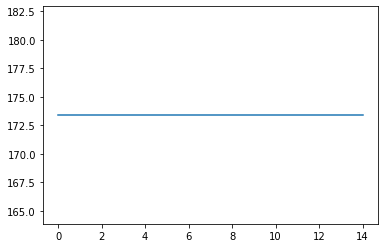

In [ ]:
series_predicted_sarima = pd.Series(predictions_sarima, dtype='float64')

series_predicted_sarima.plot()

Automatically created module for IPython interactive environment


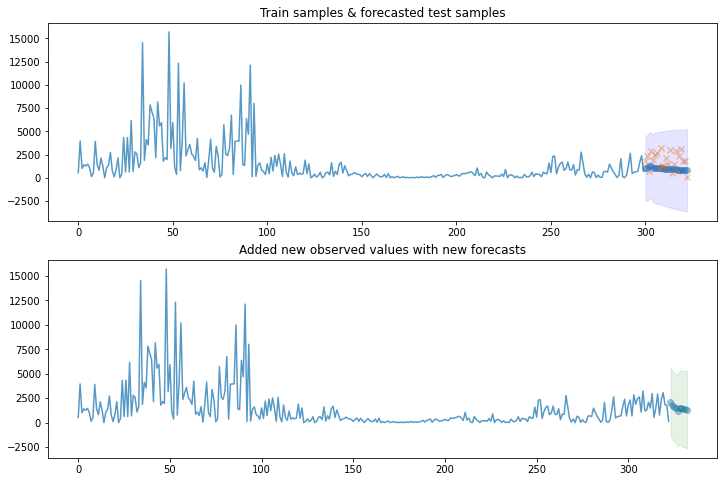

In [ ]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from pmdarima import model_selection
import matplotlib.pyplot as plt
import numpy as np

# #############################################################################
# Load the data and split it into separate pieces
data = ita_df_W
train, test = model_selection.train_test_split(data, train_size=300)

# #############################################################################
# Fit with some validation (cv) samples
arima = pm.auto_arima(train, start_p=1, start_q=1, d=0, max_p=5, max_q=5,
                      out_of_sample_size=1, suppress_warnings=True,
                      stepwise=True, error_action='ignore')

# Now plot the results and the forecast for the test set
preds, conf_int = arima.predict(n_periods=test.shape[0],
                                return_conf_int=True)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(train.shape[0] + preds.shape[0])
axes[0].plot(x_axis[:train.shape[0]], train, alpha=0.75)
axes[0].scatter(x_axis[train.shape[0]:], preds, alpha=0.4, marker='o')
axes[0].scatter(x_axis[train.shape[0]:], test, alpha=0.4, marker='x')
axes[0].fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')

# fill the section where we "held out" samples in our model fit

axes[0].set_title("Train samples & forecasted test samples")

# Now add the actual samples to the model and create NEW forecasts
arima.update(test)
new_preds, new_conf_int = arima.predict(n_periods=10, return_conf_int=True)
new_x_axis = np.arange(data.shape[0] + 10)

axes[1].plot(new_x_axis[:data.shape[0]], data, alpha=0.75)
axes[1].scatter(new_x_axis[data.shape[0]:], new_preds, alpha=0.4, marker='o')
axes[1].fill_between(new_x_axis[-new_preds.shape[0]:],
                     new_conf_int[:, 0],
                     new_conf_int[:, 1],
                     alpha=0.1, color='g')
axes[1].set_title("Added new observed values with new forecasts")
plt.show()

In [ ]:
### Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='W'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
#sarimax_gridsearch(ita_df_W, pdq, pdqs, freq='W')

# Checking for Stationarity

In [40]:
# Other Method to check if the series is stationary or not


from statsmodels.tsa.stattools import kpss
t_stat, p_value, _, critical_values = kpss(ita_df_D.values, nlags='auto')

print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 3.29
Critial Values:
   10%, 0.35
Critial Values:
   5%, 0.46
Critial Values:
   2.5%, 0.57
Critial Values:
   1%, 0.74

p-value: 0.01
Non-Stationary


C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [37]:
from statsmodels.tsa.stattools import adfuller

X = ita_df_W.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.165505
p-value: 0.219002
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [ ]:
decompose_ita_M= sm.tsa.seasonal_decompose(ita_df_M, model="additive")
decompose_ita_W= sm.tsa.seasonal_decompose(ita_df_W, model="additive")
decompose_ita_D= sm.tsa.seasonal_decompose(ita_df_D, model="additive")

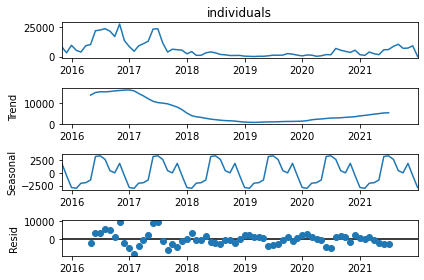

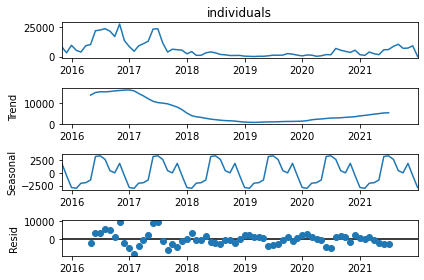

In [ ]:
decompose_ita_M.plot()

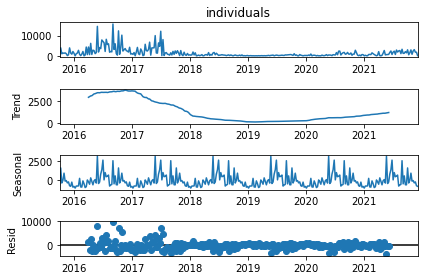

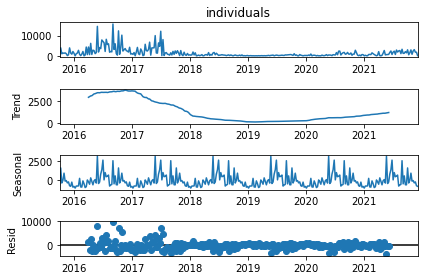

In [ ]:
decompose_ita_W.plot()

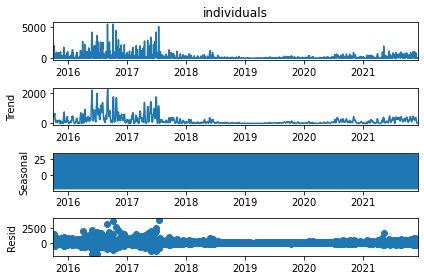

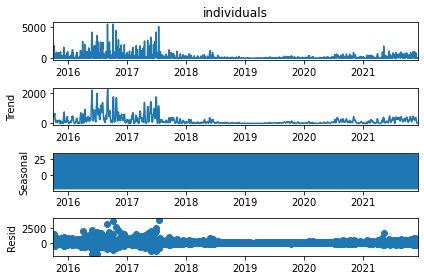

In [ ]:
decompose_ita_D.plot()

In [ ]:
#rolling_forecast(train_set_weekly_multi["individuals"],test_set_weekly_multi, exogen= exog_data_weekly, Modell_order=(1,1,1),Sarima_order=(0,0,0,12))

# Vector Auto Regressiv Modell VAR

# Make Time Series Data Stationary

In [ ]:
ita_df_W_diff = ita_df_W.diff(periods=1)
ita_df_W_diff = ita_df_W_diff.dropna()
ita_df_W_diff

Date
2015-10-11    3421.0
2015-10-18   -2947.0
2015-10-25     392.0
2015-11-01    -134.0
2015-11-08     190.0
               ...  
2021-11-07    1619.0
2021-11-14     678.0
2021-11-21   -1244.0
2021-11-28     -40.0
2021-12-05   -1655.0
Freq: W-SUN, Name: individuals, Length: 322, dtype: float64

In [ ]:
ita_df_W_diff

Date
2015-10-11    3421.0
2015-10-18   -2947.0
2015-10-25     392.0
2015-11-01    -134.0
2015-11-08     190.0
               ...  
2021-11-07    1619.0
2021-11-14     678.0
2021-11-21   -1244.0
2021-11-28     -40.0
2021-12-05   -1655.0
Freq: W-SUN, Name: individuals, Length: 322, dtype: float64

In [ ]:
ita_df_W

Date
2015-10-04     533
2015-10-11    3954
2015-10-18    1007
2015-10-25    1399
2015-11-01    1265
              ... 
2021-11-07    2380
2021-11-14    3058
2021-11-21    1814
2021-11-28    1774
2021-12-05     119
Freq: W-SUN, Name: individuals, Length: 323, dtype: int64

In [ ]:
ita_df_D_diff = ita_df_D.diff(periods=1)
ita_df_D_diff = ita_df_D_diff.dropna()
ita_df_D_diff

Date
2015-10-02    -343.0
2015-10-03     128.0
2015-10-04     -66.0
2015-10-05     -62.0
2015-10-06    2001.0
               ...  
2021-12-01       0.0
2021-12-02     119.0
2021-12-03    -119.0
2021-12-04       0.0
2021-12-05       0.0
Freq: D, Name: individuals, Length: 2257, dtype: float64

In [ ]:
ita_df_M_diff = ita_df_M.diff(periods=1)
ita_df_M_diff = ita_df_M_diff.dropna()
ita_df_M_diff

Date
2015-11-30   -5017.0
2015-12-31    6335.0
2016-01-31   -4320.0
2016-02-29   -1335.0
2016-03-31    5316.0
               ...  
2021-08-31    1708.0
2021-09-30   -3367.0
2021-10-31     191.0
2021-11-30    1916.0
2021-12-31   -8907.0
Freq: M, Name: individuals, Length: 74, dtype: float64

In [31]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    return p_value

# ..


#def p_values(df):
  check_status = False 
  while  not check_status:    
    column_list = df.columns
    p_value_list = []
    for item in column_list:
      df_temp = df[item]
      p_value = adfuller_test(df_temp,item)
      p_value_list.append(p_value)  
    check_p_value = [item for item in p_value_list if item >0.05]
    if len(check_p_value)>0:
      df = df.diff().dropna()
      check_status = False
    else:
      check_status = True
  return df


#p_values(var_train)

In [ ]:
ita_df_W_diff=pd.DataFrame({'Date':ita_df_W_diff.index, 'individuals':ita_df_W_diff.values})

type(ita_df_W_diff)

pandas.core.frame.DataFrame

In [ ]:
ita_df_W_diff = ita_df_W_diff.set_index("Date")


In [ ]:
ita_df_W_diff

,individuals
Date,
2015-10-11,3421.0
2015-10-18,-2947.0
2015-10-25,392.0
2015-11-01,-134.0
2015-11-08,190.0
...,...
2021-11-07,1619.0
2021-11-14,678.0
2021-11-21,-1244.0


In [ ]:
# Differenzieren
combined_df_w_diff = weather_ita_weekly_adjusted.merge(ita_df_W_diff, left_index=True, right_index=True)
combined_df_d_diff = weather_ita_daily_adjusted.merge(ita_df_D_diff, left_index=True, right_index=True)
combined_df_m_diff = weather_ita_monthly_adjusted.merge(ita_df_M_diff, left_index=True, right_index=True)
combined_df_m_diff

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,individuals
Date,,,,,,,,,,,,,,,,,,,
2015-11-30,0.389152,0.550840,0.462838,0.459618,0.041369,0.326048,0.456213,0.523774,0.335163,0.308402,0.525166,0.142878,0.760355,0.348422,0.299428,0.511541,0.101178,0.756294,-5017.0
2015-12-31,0.185228,0.306986,0.239501,0.229344,0.000000,0.130157,0.244073,1.000000,0.020212,0.000000,0.248175,0.000000,0.793257,0.033267,0.000000,0.228502,0.000000,0.788687,6335.0
2016-01-31,0.096399,0.173092,0.129254,0.119361,0.285937,0.091732,0.109440,0.618038,0.514512,0.555785,0.534754,0.515680,0.867353,0.538624,0.564739,0.568197,0.408976,0.863470,-4320.0
2016-02-29,0.121368,0.217752,0.163452,0.093935,0.409997,0.132616,0.117219,0.459877,0.394072,0.517014,0.344144,0.685454,0.853323,0.453701,0.554294,0.369363,0.617794,0.852110,-1335.0
2016-03-31,0.154150,0.166711,0.157035,0.108698,0.650933,0.200652,0.119023,0.171754,0.435282,0.569925,0.328550,0.785392,0.594497,0.522950,0.646623,0.383576,0.730631,0.589820,5316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.875535,0.922514,0.897130,0.889731,0.646156,0.863376,0.882043,0.151578,0.123130,0.306883,0.075315,0.684400,0.257227,0.180291,0.347708,0.096047,0.635829,0.255104,2694.0
2021-08-31,1.000000,1.000000,1.000000,1.000000,0.769719,1.000000,1.000000,0.142093,0.141240,0.285576,0.192352,0.509568,0.000000,0.208532,0.333315,0.191822,0.507976,0.000000,1708.0
2021-09-30,0.884260,0.931034,0.905800,0.906176,0.586588,0.872146,0.910999,0.266822,0.280527,0.434100,0.227405,0.697282,0.298154,0.311722,0.426179,0.232677,0.591856,0.304066,-3367.0


In [ ]:
from statsmodels.tsa.api import VAR

# Train Test Split for VAR

In [ ]:
# Train Test Split
var_train, var_test = np.split(combined_df_w_diff.loc[:,"PS":"individuals"], [int(.80*len(combined_df_w_diff.loc[:,"PS":"individuals"]))])
var_train_d, var_test_d = np.split(combined_df_d_diff.loc[:,"PS":"individuals"], [int(.80*len(combined_df_d_diff.loc[:,"PS":"individuals"]))])
var_train_m, var_test_m = np.split(combined_df_m_diff.loc[:,"PS":"individuals"], [int(.80*len(combined_df_m_diff.loc[:,"PS":"individuals"]))])



In [ ]:
# drop weekly
var_train = var_train.drop(columns=["WD50M", "WS50M_RANGE"])
var_test = var_test.drop(columns=["WD50M", "WS50M_RANGE"])
# drop daily
var_train_d = var_train_d.drop(columns=["WD50M", "WS50M_RANGE"])
var_test_d = var_test_d.drop(columns=["WD50M", "WS50M_RANGE"])

#drop monthly
var_train_m = var_train_m.drop(columns=["WD50M", "WS50M_RANGE"])
var_test_m = var_test_m.drop(columns=["WD50M", "WS50M_RANGE"])



In [ ]:
test = train_set_weekly_multi["individuals"].shift(1)+var_train["individuals"]

In [ ]:
test

Date
2015-10-04       NaN
2015-10-11    3954.0
2015-10-18    1007.0
2015-10-25    1399.0
2015-11-01    1265.0
               ...  
2020-08-09     426.0
2020-08-16    1129.0
2020-08-23    1542.0
2020-08-30    1693.0
2020-09-06     798.0
Name: individuals, Length: 258, dtype: float64

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(var_train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  -47.051752678041915
BIC:  -45.5284342448671

Order = 2
AIC:  -47.08431307644384
BIC:  -44.16797839219573

Order = 3
AIC:  -46.94766103921201
BIC:  -42.630442051905916

Order = 4
AIC:  -46.73149349066752
BIC:  -41.00544728363873

Order = 5
AIC:  -46.493891787278585
BIC:  -39.35099958636261

Order = 6
AIC:  -46.16939701208921
BIC:  -37.60156317595221

Order = 7
AIC:  -46.07649930352683
BIC:  -36.07555029679805

Order = 8
AIC:  -45.90787531765689
BIC:  -34.46555866650663

Order = 9
AIC:  -46.01240439933897
BIC:  -33.120387629136815

Order = 10
AIC:  -45.97927932665487
BIC:  -31.62914888133399



C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packa

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model_d = VAR(var_train_d)
    results_d = model_d.fit(i)
    print('Order =', i)
    print('AIC: ', results_d.aic)
    print('BIC: ', results_d.bic)
    print()

C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\

Order = 1
AIC:  -49.6776082420278
BIC:  -49.34237887003862

Order = 2
AIC:  -49.869126569950254
BIC:  -49.228852850109604

Order = 3
AIC:  -49.94495430591065
BIC:  -48.99935926937781

Order = 4
AIC:  -49.96101907486466
BIC:  -48.70982534275909

Order = 5
AIC:  -49.955148506022624
BIC:  -48.398078288588756

Order = 6
AIC:  -49.93817585624524
BIC:  -48.07495095201521

Order = 7
AIC:  -49.932203101453794
BIC:  -47.76254489640795

Order = 8
AIC:  -49.89590275473138
BIC:  -47.419532221456656

Order = 9
AIC:  -49.868687360773556
BIC:  -47.08532505761957

Order = 10
AIC:  -49.83234947845119
BIC:  -46.74171554868428



C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [ ]:
for i in [1,2,3]:
    model_m = VAR(var_train_m)
    results_m = model_m.fit(i)
    print('Order =', i)
    print('AIC: ', results_m.aic)
    print('BIC: ', results_m.bic)
    print()

Order = 1
AIC:  -46.82563788014808
BIC:  -42.88290736327439

Order = 2
AIC:  -47.81013243499844
BIC:  -40.21506359474162

Order = 3
AIC:  -48.30126902994464
BIC:  -36.98720925863435



# VAR + VAR Rolling

In [ ]:

#var_train["individuals"] = var_train["individuals"].astype(float)
history = [x for x in var_train[:].values]
df_history = pd.DataFrame(history, index= var_train["individuals"].index, columns=var_train.columns)
df_history

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals
Date,,,,,,,,,,
2015-10-11,0.229057,0.259608,0.403235,0.185534,0.552025,0.546535,0.280114,0.441000,0.175294,3421.0
2015-10-18,0.271822,0.178046,0.274772,0.095973,0.487689,0.320824,0.195996,0.304741,0.096380,-2947.0
2015-10-25,0.269479,0.542518,0.632088,0.543578,0.404819,0.717527,0.545424,0.658278,0.518101,392.0
2015-11-01,0.400117,0.164963,0.217513,0.189942,0.281705,0.488261,0.162012,0.213288,0.185614,-134.0
2015-11-08,0.634446,0.076247,0.116564,0.138449,0.204925,0.320141,0.074697,0.117999,0.129089,190.0
...,...,...,...,...,...,...,...,...,...,...
2020-08-09,0.182191,0.244276,0.331660,0.237227,0.380461,0.400978,0.244448,0.286021,0.245951,-1910.0
2020-08-16,0.257762,0.260221,0.409184,0.193949,0.548848,0.118379,0.284993,0.447445,0.196412,703.0
2020-08-23,0.200937,0.201962,0.333891,0.189742,0.447710,0.219254,0.224933,0.358907,0.199746,413.0


In [ ]:

#history = [x for x in var_train["individuals"]]
#history_exogen = [x for x in exogen]
predictions = list()
lagged_Values = var_test.values
#var_train["individuals"] = var_train["individuals"].astype(int)
#history = [x for x in var_train["individuals"]]'''
for t in range(len(var_test["individuals"])):
    varmodell = VAR(df_history, freq="w")
    model_fit = varmodell.fit(20)
    output = model_fit.forecast(y = lagged_Values, steps = 1)
    
    yhat = output[0]
    obs = var_test["individuals"][t]
    predictions.append(obs)
    #df_history.append(obs)

predictions

[178.0,
 715.0,
 -833.0,
 -42.0,
 607.0,
 -1131.0,
 575.0,
 -21.0,
 1914.0,
 -1170.0,
 -1225.0,
 -299.0,
 309.0,
 -375.0,
 646.0,
 -96.0,
 -530.0,
 267.0,
 -234.0,
 -13.0,
 620.0,
 27.0,
 -72.0,
 862.0,
 -432.0,
 -394.0,
 -293.0,
 -332.0,
 241.0,
 1793.0,
 -1948.0,
 -95.0,
 240.0,
 1028.0,
 1350.0,
 -2166.0,
 129.0,
 49.0,
 50.0,
 975.0,
 709.0,
 -1705.0,
 1146.0,
 488.0,
 -1628.0,
 2168.0,
 -974.0,
 555.0,
 190.0,
 -1542.0,
 2157.0,
 -2023.0,
 47.0,
 826.0,
 -597.0,
 1474.0,
 -2431.0,
 972.0,
 1412.0,
 -2155.0,
 1619.0,
 678.0,
 -1244.0,
 -40.0,
 -1655.0]

In [ ]:

    
#df_history = pd.DataFrame(history, index= var_train["individuals"].index, columns=var_train.columns)

In [ ]:

idx = pd.date_range("2020-09-13", periods=len(var_test), freq='W')
df_forecast_new = pd.DataFrame(index = idx, data = predictions, columns=["individuals"])
df_forecast_new

,individuals
2020-09-13,178.0
2020-09-20,715.0
2020-09-27,-833.0
2020-10-04,-42.0
2020-10-11,607.0
...,...
2021-11-07,1619.0
2021-11-14,678.0
2021-11-21,-1244.0
2021-11-28,-40.0


In [ ]:
df_forecast_new["individuals_forecast"] = (combined_df_w["individuals"].iloc[len(-var_test-1)]-combined_df_w["individuals"].iloc[-len(-var_test-2)]) + df_forecast_new["individuals"].cumsum()
df_forecast_new["individuals_old"] = combined_df_w["individuals"]
df_forecast_new["individuals_forecast"] = df_forecast_new["individuals_forecast"].apply(lambda x : x if x > 0 else 0)

In [ ]:
df_forecast_new

,individuals,individuals_forecast,individuals_old
2020-09-13,178.0,282.0,976
2020-09-20,715.0,997.0,1691
2020-09-27,-833.0,164.0,858
2020-10-04,-42.0,122.0,816
2020-10-11,607.0,729.0,1423
...,...,...,...
2021-11-07,1619.0,1686.0,2380
2021-11-14,678.0,2364.0,3058
2021-11-21,-1244.0,1120.0,1814
2021-11-28,-40.0,1080.0,1774


<AxesSubplot:>

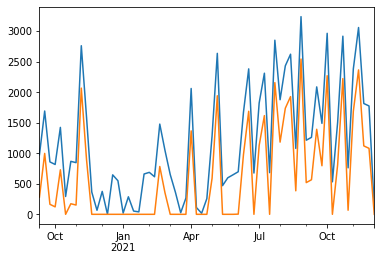

In [ ]:

df_forecast_new["individuals_old"].plot()
df_forecast_new["individuals_forecast"].plot()

In [ ]:
error_var_new = sqrt(mean_squared_error(df_forecast_new["individuals_old"], df_forecast_new["individuals_forecast"]))
mae_var_new = mean_absolute_percentage_error(df_forecast_new["individuals_old"], df_forecast_new["individuals_forecast"])
error_var_new
print("RMSE: ", error_var_new, "MAE: " ,mae_var_new)

RMSE:  597.3667987992741 MAE:  0.6817870992060434


In [ ]:
from pmdarima.utils import diff_inv
def inv_diff (df_orig_column,df_diff_column, periods):
    # Generate np.array for the diff_inv function - it includes first n values(n = 
    # periods) of original data & further diff values of given periods
    value = np.array(df_orig_column[:periods].tolist()+df_diff_column[periods:].tolist())

    # Generate np.array with inverse diff
    inv_diff_vals = diff_inv(value, periods,1 )[periods:]
    return inv_diff_vals

In [ ]:
test= inv_diff(ita_df_W,ita_df_W_diff["individuals"], periods=1)

In [ ]:
test = ita_df_W.shift(1) + ita_df_W_diff["individuals"]

In [ ]:
test

Date
2015-10-04       NaN
2015-10-11    3954.0
2015-10-18    1007.0
2015-10-25    1399.0
2015-11-01    1265.0
               ...  
2021-11-07    2380.0
2021-11-14    3058.0
2021-11-21    1814.0
2021-11-28    1774.0
2021-12-05     119.0
Name: individuals, Length: 323, dtype: float64

# VAR Rolling Daily

In [ ]:
history_d = [x for x in var_train_d[:].values]
df_history_d = pd.DataFrame(history_d, index= var_train_d["individuals"].index, columns=var_train_d.columns)
df_history_d

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals
Date,,,,,,,,,,
2015-10-02,0.557029,0.097444,0.167598,0.114824,0.168704,0.454596,0.103540,0.189430,0.093257,-343.0
2015-10-03,0.623342,0.264377,0.314246,0.284490,0.177669,0.208875,0.259185,0.315914,0.281205,128.0
2015-10-04,0.668435,0.130990,0.131285,0.109683,0.131214,0.522332,0.126921,0.128266,0.098278,-66.0
2015-10-05,0.620690,0.078275,0.090084,0.056555,0.133659,0.726121,0.073480,0.074228,0.053085,-62.0
2015-10-06,0.517241,0.174121,0.203911,0.095116,0.229829,0.718856,0.193721,0.274941,0.098996,2001.0
...,...,...,...,...,...,...,...,...,...,...
2020-09-05,0.488064,0.579073,0.722765,0.475578,0.474328,0.298579,0.584502,0.713183,0.515065,-11.0
2020-09-06,0.381963,0.325879,0.567039,0.048843,0.696822,0.383779,0.329993,0.561164,0.043042,-7.0
2020-09-07,0.437666,0.279553,0.270251,0.269066,0.142624,0.646936,0.269205,0.245249,0.271162,-15.0


In [ ]:
#history = [x for x in var_train["individuals"]]
#history_exogen = [x for x in exogen]
predictions_d = list()
lagged_Values_d = var_test_d.values
#var_train["individuals"] = var_train["individuals"].astype(int)
#history = [x for x in var_train["individuals"]]'''
for t in range(len(var_test_d["individuals"])):
    varmodell_d = VAR(df_history_d, freq="d")
    model_fit_d = varmodell_d.fit(50)
    output_d = model_fit_d.forecast(y = lagged_Values_d, steps = 1)
    
    yhat_d = output_d[0]
    obs_d = var_test_d["individuals"][t]
    predictions_d.append(obs_d)
    #df_history.append(obs)

KeyboardInterrupt: 

In [ ]:
idx_d = pd.date_range("2020-09-10", periods=len(var_test_d), freq='D')
df_forecast_d_new = pd.DataFrame(index = idx_d, data = predictions_d, columns=["individuals"])
df_forecast_d_new

,individuals
2020-09-10,-49.0
2020-09-11,-162.0
2020-09-12,158.0
2020-09-13,-55.0
2020-09-14,-72.0
...,...
2021-12-01,0.0
2021-12-02,119.0
2021-12-03,-119.0
2021-12-04,0.0


In [ ]:
df_forecast_d_new["individuals_forecast"] = (combined_df_d["individuals"].iloc[len(-var_test_d-1)]-combined_df_d["individuals"].iloc[-len(-var_test_d-2)]) + df_forecast_d_new["individuals"].cumsum()
df_forecast_d_new["individuals_old"] = combined_df_d["individuals"]
df_forecast_d_new["individuals_forecast"] = df_forecast_d_new["individuals_forecast"].apply(lambda x : x if x > 0 else 0)
df_forecast_d_new


,individuals,individuals_forecast,individuals_old
2020-09-10,-49.0,0.0,205
2020-09-11,-162.0,0.0,43
2020-09-12,158.0,0.0,201
2020-09-13,-55.0,0.0,146
2020-09-14,-72.0,0.0,74
...,...,...,...
2021-12-01,0.0,0.0,0
2021-12-02,119.0,0.0,119
2021-12-03,-119.0,0.0,0
2021-12-04,0.0,0.0,0


<AxesSubplot:>

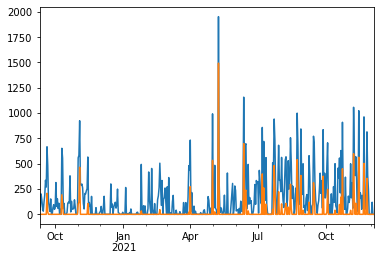

In [ ]:

df_forecast_d_new["individuals_old"].plot()
df_forecast_d_new["individuals_forecast"].plot()

In [ ]:
error_var_new_d = sqrt(mean_squared_error(df_forecast_d_new["individuals_old"], df_forecast_d_new["individuals_forecast"]))
mae_var_new_d = mean_absolute_percentage_error(df_forecast_d_new["individuals_old"], df_forecast_d_new["individuals_forecast"])
error_var_new_d
print("RMSE: ", error_var_new_d, "MAE: " ,mae_var_new_d)

RMSE:  211.18872363634958 MAE:  0.6803605729642777


# VAR Modell Weekly

In [ ]:
results = model.fit(10)
lagged_Values = var_test.values

pred = results.forecast(y=lagged_Values, steps=len(var_test)) 

idx = pd.date_range("2020-09-13", periods=len(var_test), freq='W')
df_forecast = pd.DataFrame(index = idx, data = pred, columns=list(var_test.columns))

df_forecast

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals
2020-09-13,0.482456,0.340299,0.413704,0.338130,0.364654,0.343583,0.366787,0.439898,0.360895,245.641872
2020-09-20,0.276035,0.614683,0.753386,0.475439,0.667307,0.614167,0.665148,0.800547,0.508872,1517.674154
2020-09-27,0.326872,0.234373,0.321050,0.230762,0.374558,0.427350,0.263417,0.357693,0.238638,70.923868
2020-10-04,0.469516,0.369084,0.471169,0.284990,0.516978,0.690209,0.376261,0.479484,0.277157,-630.474391
2020-10-11,0.481817,0.599349,0.660418,0.534132,0.457400,0.409939,0.610845,0.679478,0.543185,-347.580112
...,...,...,...,...,...,...,...,...,...,...
2021-11-07,0.403850,0.390614,0.488493,0.302486,0.518360,0.544665,0.411539,0.512803,0.310236,-29.281127
2021-11-14,0.398432,0.388924,0.488305,0.300118,0.521221,0.541252,0.411108,0.514075,0.308359,36.822596
2021-11-21,0.393035,0.388535,0.489260,0.298820,0.524302,0.538245,0.411583,0.515883,0.307682,-17.867801
2021-11-28,0.388824,0.385734,0.487476,0.295889,0.525633,0.534255,0.409860,0.515208,0.305387,33.224351


In [ ]:
#test = test_set_weekly_multi["individuals"].iloc[-1] + var_test["individuals"].cumsum()
#test.plot()

In [ ]:
df_forecast["individuals_forecast"] = (combined_df_w["individuals"].iloc[len(var_test)]-combined_df_w["individuals"].iloc[-len(var_test)]) + df_forecast["individuals"].cumsum()
df_forecast["individuals"] = combined_df_w["individuals"]
df_forecast["individuals_forecast"] = df_forecast["individuals_forecast"].apply(lambda x : x if x > 0 else 0)



<AxesSubplot:xlabel='Date', ylabel='individuals'>

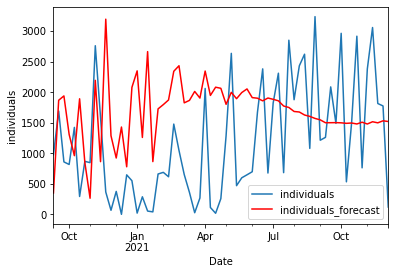

In [ ]:

df_forecast["individuals"][:].plot(xlabel= "Date", ylabel= "individuals", legend= "individuals")
df_forecast["individuals_forecast"][:].plot(color ="red", legend = True)

In [ ]:
error_var = sqrt(mean_squared_error(df_forecast["individuals"][:33], df_forecast["individuals_forecast"][:33]))
mae_var = mean_absolute_error(df_forecast["individuals"][:33], df_forecast["individuals_forecast"][:33])
print("RMSE: ",error_var,"MAE: ",mae_var)


RMSE:  1367.335299314667 MAE:  1173.5539175456856


# VAR Daily

In [ ]:
result_d = model_d.fit(70)
lagged_Values_d = var_test_d.values

pred_d = result_d.forecast(y=lagged_Values_d, steps=len(var_test_d)) 

idx_d = pd.date_range("2020-09-10", periods=len(var_test_d), freq='D')
df_forecast_d = pd.DataFrame(index = idx_d, data = pred_d, columns=list(var_test_d.columns))
df_forecast_d


,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals
2020-09-10,0.432422,0.572736,0.594735,0.530835,0.271567,0.809819,0.588148,0.619524,0.536569,-826.555483
2020-09-11,0.474117,0.451074,0.446853,0.313893,0.305141,0.727791,0.439653,0.427037,0.330281,250.562648
2020-09-12,0.563256,0.418837,0.409080,0.377582,0.200552,0.578530,0.417772,0.395809,0.384033,-168.578464
2020-09-13,0.563976,0.419966,0.466145,0.387092,0.258503,0.395815,0.432625,0.512568,0.388825,1067.515148
2020-09-14,0.544779,0.337083,0.388893,0.238144,0.309631,0.409590,0.356144,0.397233,0.235625,-382.924891
...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.539180,0.344773,0.399490,0.251338,0.309494,0.574372,0.359528,0.419112,0.256776,-0.696567
2021-12-02,0.538598,0.344556,0.399361,0.251372,0.309313,0.572631,0.359418,0.418900,0.256842,0.510658
2021-12-03,0.537734,0.344076,0.399488,0.250012,0.310752,0.572430,0.358979,0.419091,0.255525,2.831075
2021-12-04,0.537253,0.343505,0.398258,0.249683,0.309630,0.572300,0.358515,0.418036,0.255447,-2.253320


In [ ]:
df_forecast_d["individuals_forecast"] = (combined_df_d["individuals"].iloc[len(-var_test_d-1)]-combined_df_d["individuals"].iloc[-len(-var_test_d-2)]) + df_forecast_d["individuals"].cumsum()
df_forecast_d["individuals"] = combined_df_d["individuals"]
df_forecast_d["individuals_forecast"] = df_forecast_d["individuals_forecast"].apply(lambda x : x if x > 0 else 0)

df_forecast_d

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals,individuals_forecast
2020-09-10,0.432422,0.572736,0.594735,0.530835,0.271567,0.809819,0.588148,0.619524,0.536569,205,0.000000
2020-09-11,0.474117,0.451074,0.446853,0.313893,0.305141,0.727791,0.439653,0.427037,0.330281,43,0.000000
2020-09-12,0.563256,0.418837,0.409080,0.377582,0.200552,0.578530,0.417772,0.395809,0.384033,201,0.000000
2020-09-13,0.563976,0.419966,0.466145,0.387092,0.258503,0.395815,0.432625,0.512568,0.388825,146,117.943850
2020-09-14,0.544779,0.337083,0.388893,0.238144,0.309631,0.409590,0.356144,0.397233,0.235625,74,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.539180,0.344773,0.399490,0.251338,0.309494,0.574372,0.359528,0.419112,0.256776,0,4.587271
2021-12-02,0.538598,0.344556,0.399361,0.251372,0.309313,0.572631,0.359418,0.418900,0.256842,119,5.097929
2021-12-03,0.537734,0.344076,0.399488,0.250012,0.310752,0.572430,0.358979,0.419091,0.255525,0,7.929004
2021-12-04,0.537253,0.343505,0.398258,0.249683,0.309630,0.572300,0.358515,0.418036,0.255447,0,5.675684


<AxesSubplot:xlabel='Date', ylabel='individuals'>

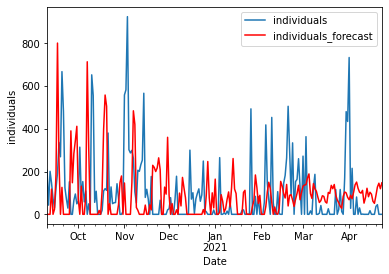

In [ ]:

df_forecast_d["individuals"][:226].plot(xlabel= "Date", ylabel= "individuals", legend= "individuals")
df_forecast_d["individuals_forecast"][:226].plot(color ="red", legend = "predicted")

In [ ]:
error_var_daily = sqrt(mean_squared_error(df_forecast_d["individuals"][:226], df_forecast_d["individuals_forecast"][:226]))
mae_var_daily = mean_absolute_error(df_forecast_d["individuals"][:226], df_forecast_d["individuals_forecast"][:226])
print("RMSE: ",error_var_daily,"MAE: ",mae_var_daily)

RMSE:  202.7315836633397 MAE:  137.85717661490904


# VAR Monthly

In [ ]:
result_m = model_m.fit(2)

In [ ]:
result_m = model_m.fit(2)
lagged_Values_m = var_test_m.values

pred_m = result_m.forecast(y=lagged_Values_m, steps=len(var_test_m))


idx_m = pd.date_range("2020-09-30", periods=len(var_test_m), freq='M')
df_forecast_m = pd.DataFrame(index = idx_m, data = pred_m, columns=list(var_test_m.columns))

df_forecast_m


,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals
2020-09-30,0.256095,0.472064,0.569794,0.493358,0.587243,0.538673,0.517321,0.579700,0.528090,1438.879463
2020-10-31,0.463399,0.430462,0.514240,0.486133,0.509746,0.521817,0.469646,0.532165,0.489525,654.246790
2020-11-30,0.408738,0.367044,0.481772,0.327365,0.650723,0.580738,0.417329,0.527968,0.340112,-793.152672
2020-12-31,0.292898,0.397676,0.522290,0.331174,0.709445,0.584897,0.448263,0.555641,0.352765,-815.018180
2021-01-31,0.231375,0.405972,0.551527,0.355120,0.725773,0.464846,0.468774,0.588270,0.382321,873.391668
2021-02-28,0.252868,0.306814,0.469281,0.275002,0.694715,0.380595,0.377098,0.519914,0.296465,848.764771
2021-03-31,0.244181,0.262325,0.422967,0.223168,0.685497,0.378808,0.326821,0.470348,0.240740,217.540536
2021-04-30,0.220598,0.284610,0.437645,0.251629,0.674036,0.377223,0.337043,0.467292,0.265059,-348.269187
2021-05-31,0.245665,0.286398,0.431838,0.272246,0.640095,0.371675,0.331523,0.450917,0.280820,-194.280116
2021-06-30,0.284378,0.287457,0.422588,0.280571,0.615642,0.408197,0.326751,0.438942,0.285228,-384.962873


In [ ]:
df_forecast_m["individuals_forecast"] = (combined_df_m["individuals"].iloc[len(-var_test_m-1)]-combined_df_m["individuals"].iloc[-len(-var_test_m-2)]) + df_forecast_m["individuals"].cumsum()
df_forecast_m["individuals"] = combined_df_m["individuals"]
df_forecast_m["individuals_forecast"] = df_forecast_m["individuals_forecast"].apply(lambda x : x if x > 0 else 0)
df_forecast_m

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals,individuals_forecast
2020-09-30,0.256095,0.472064,0.569794,0.493358,0.587243,0.538673,0.517321,0.579700,0.528090,4387,1504.879463
2020-10-31,0.463399,0.430462,0.514240,0.486133,0.509746,0.521817,0.469646,0.532165,0.489525,3477,2159.126253
2020-11-30,0.408738,0.367044,0.481772,0.327365,0.650723,0.580738,0.417329,0.527968,0.340112,5360,1365.973581
2020-12-31,0.292898,0.397676,0.522290,0.331174,0.709445,0.584897,0.448263,0.555641,0.352765,1570,550.955401
2021-01-31,0.231375,0.405972,0.551527,0.355120,0.725773,0.464846,0.468774,0.588270,0.382321,1040,1424.347069
2021-02-28,0.252868,0.306814,0.469281,0.275002,0.694715,0.380595,0.377098,0.519914,0.296465,3824,2273.111840
2021-03-31,0.244181,0.262325,0.422967,0.223168,0.685497,0.378808,0.326821,0.470348,0.240740,2386,2490.652377
2021-04-30,0.220598,0.284610,0.437645,0.251629,0.674036,0.377223,0.337043,0.467292,0.265059,1596,2142.383189
2021-05-31,0.245665,0.286398,0.431838,0.272246,0.640095,0.371675,0.331523,0.450917,0.280820,5680,1948.103073
2021-06-30,0.284378,0.287457,0.422588,0.280571,0.615642,0.408197,0.326751,0.438942,0.285228,5884,1563.140201


<AxesSubplot:xlabel='Date', ylabel='individuals'>

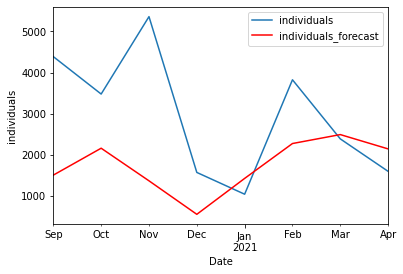

In [ ]:
df_forecast_m["individuals"][:8].plot(xlabel= "Date", ylabel= "individuals", legend= "individuals")
df_forecast_m["individuals_forecast"][:8].plot(color ="red", legend = "predicted")

In [ ]:
error_var_M = sqrt(mean_squared_error(df_forecast_m["individuals"][:8], df_forecast_m["individuals_forecast"][:8]))
mae_var_M = mean_absolute_error(df_forecast_m["individuals"][:8], df_forecast_m["individuals_forecast"][:8])
print("RMSE: ", error_var_M, "MAE: " ,mae_var_M)


RMSE:  1933.1506795212588 MAE:  1474.9170121792413


In [ ]:
history_m = [x for x in var_train_m[:].values]
df_forecast_m = pd.DataFrame(history_m, index= var_train_m["individuals"].index, columns=var_train_m.columns)
df_forecast_m

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals
Date,,,,,,,,,,
2015-11-30,0.523774,0.335163,0.308402,0.525166,0.142878,0.760355,0.348422,0.299428,0.511541,-5017.0
2015-12-31,1.000000,0.020212,0.000000,0.248175,0.000000,0.793257,0.033267,0.000000,0.228502,6335.0
2016-01-31,0.618038,0.514512,0.555785,0.534754,0.515680,0.867353,0.538624,0.564739,0.568197,-4320.0
2016-02-29,0.459877,0.394072,0.517014,0.344144,0.685454,0.853323,0.453701,0.554294,0.369363,-1335.0
2016-03-31,0.171754,0.435282,0.569925,0.328550,0.785392,0.594497,0.522950,0.646623,0.383576,5316.0
2016-04-30,0.037667,0.454712,0.659541,0.447512,0.781658,0.353571,0.587004,0.789138,0.515261,934.0
2016-05-31,0.165891,0.337699,0.539256,0.189449,0.906422,0.385143,0.437765,0.621927,0.222660,11589.0
2016-06-30,0.147433,0.201663,0.414818,0.135437,0.778967,0.263527,0.286299,0.488428,0.148238,584.0
2016-07-31,0.200034,0.121109,0.283381,0.129811,0.581906,0.142575,0.160714,0.285231,0.135851,1122.0


# Var Monthly Rolling

In [ ]:
history_m = [x for x in var_train_m[:].values]
df_history_m = pd.DataFrame(history_m, index= var_train_m["individuals"].index, columns=var_train_m.columns)
df_history_m
#history = [x for x in var_train["individuals"]]
#history_exogen = [x for x in exogen]
predictions_m = list()
lagged_Values_m = var_test_m.values
#var_train["individuals"] = var_train["individuals"].astype(int)
#history = [x for x in var_train["individuals"]]'''
for t in range(len(var_test_m["individuals"])):
    varmodell_m = VAR(df_history_m, freq="M")
    model_fit_m = varmodell_m.fit(1)
    output_m = model_fit_m.forecast(y = lagged_Values_m, steps = 1)
    
    yhat_m = output_m[0]
    obs_m = var_test_m["individuals"][t]
    predictions_m.append(obs_m)
    
    

idx_m = pd.date_range("2020-09-30", periods=len(var_test_m), freq='M')
df_forecast_m_new = pd.DataFrame(index = idx_m, data = predictions_m, columns=["individuals"])
df_forecast_m_new


df_forecast_m_new["individuals_forecast"] = (combined_df_m["individuals"].iloc[len(-var_test_m-1)]-combined_df_m["individuals"].iloc[-len(-var_test_m-2)]) + df_forecast_m_new["individuals"].cumsum()
df_forecast_m_new["individuals_old"] = combined_df_m["individuals"]
df_forecast_m_new["individuals_forecast"] = df_forecast_m_new["individuals_forecast"].apply(lambda x : x if x > 0 else 0)
df_forecast_m_new


,individuals,individuals_forecast,individuals_old
2020-09-30,-942.0,0.0,4387
2020-10-31,-910.0,0.0,3477
2020-11-30,1883.0,97.0,5360
2020-12-31,-3790.0,0.0,1570
2021-01-31,-530.0,0.0,1040
2021-02-28,2784.0,0.0,3824
2021-03-31,-1438.0,0.0,2386
2021-04-30,-790.0,0.0,1596
2021-05-31,4084.0,417.0,5680
2021-06-30,204.0,621.0,5884


In [ ]:
idx_m = pd.date_range("2020-09-30", periods=len(var_test_m), freq='M')
df_forecast_m_new = pd.DataFrame(index = idx_m, data = predictions_m, columns=["individuals"])
df_forecast_m_new

df_forecast_m_new["individuals_forecast"] = (combined_df_m["individuals"].iloc[len(-var_test_m-1)]-combined_df_m["individuals"].iloc[-len(-var_test_m-2)]) + df_forecast_m_new["individuals"].cumsum()
df_forecast_m_new["individuals_old"] = combined_df_m["individuals"]
df_forecast_m_new["individuals_forecast"] = df_forecast_m_new["individuals_forecast"].apply(lambda x : x if x > 0 else 0)
df_forecast_m_new


,individuals,individuals_forecast,individuals_old
2020-09-30,-942.0,0.0,4387
2020-10-31,-910.0,0.0,3477
2020-11-30,1883.0,97.0,5360
2020-12-31,-3790.0,0.0,1570
2021-01-31,-530.0,0.0,1040
2021-02-28,2784.0,0.0,3824
2021-03-31,-1438.0,0.0,2386
2021-04-30,-790.0,0.0,1596
2021-05-31,4084.0,417.0,5680
2021-06-30,204.0,621.0,5884


<AxesSubplot:>

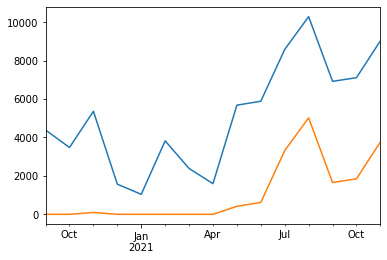

In [ ]:
df_forecast_m_new["individuals_old"].plot()
df_forecast_m_new["individuals_forecast"].plot()

# Export as CSV

In [ ]:
#exog_data_weekly_diff = combined_df_w_diff.loc[:,"PS":"WS50M_MIN"]

In [ ]:
combined_df_w.to_csv("combined_df_clean.csv")

pred = results.forecast(results.y, steps=nobs)
df_forecast = pd.DataFrame(pred, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast.tail()
# inverting transformation
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc
# show inverted results in a dataframe
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['realgdp_forecast', 'realcons_forecast']]

# LSTM Modell

In [ ]:
# converting a forecasting learning problem to a supervised learning problem

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [ ]:
combined_df_w

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,individuals
Date,,,,,,,,,,,,,,,,,,,
2015-10-04,0.656862,0.877487,0.808929,0.721467,0.156774,0.546582,0.768094,0.470269,0.110282,0.211842,0.117011,0.368546,0.288239,0.113896,0.230589,0.113369,0.315418,0.270130,533
2015-10-11,0.707703,0.823467,0.808718,0.733065,0.288655,0.619368,0.795815,0.229057,0.259608,0.403235,0.185534,0.552025,0.546535,0.280114,0.441000,0.175294,0.508435,0.545413,3954
2015-10-18,0.671684,0.814941,0.784342,0.713857,0.289453,0.586527,0.752585,0.271822,0.178046,0.274772,0.095973,0.487689,0.320824,0.195996,0.304741,0.096380,0.431542,0.327236,1007
2015-10-25,0.579065,0.704507,0.675920,0.642171,0.153024,0.478719,0.681267,0.269479,0.542518,0.632088,0.543578,0.404819,0.717527,0.545424,0.658278,0.518101,0.362495,0.715410,1399
2015-11-01,0.521235,0.594397,0.586543,0.585406,0.122387,0.425189,0.626883,0.400117,0.164963,0.217513,0.189942,0.281705,0.488261,0.162012,0.213288,0.185614,0.204786,0.493273,1265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,0.625221,0.543890,0.617605,0.610873,0.407372,0.580046,0.683791,0.186292,0.284546,0.384830,0.127429,0.601271,0.577981,0.328735,0.444069,0.121785,0.578462,0.573454,2380
2021-11-14,0.423009,0.496062,0.481337,0.509089,0.090793,0.337135,0.528291,0.324546,0.235895,0.312326,0.199960,0.403230,0.650535,0.224092,0.300905,0.189425,0.311102,0.648302,3058
2021-11-21,0.411105,0.404141,0.426661,0.470760,0.210787,0.353088,0.487666,0.419449,0.208913,0.229782,0.144260,0.359809,0.314409,0.207436,0.240908,0.141156,0.295018,0.311977,1814


In [ ]:
# weekly data
lstm_df_w = combined_df_w.loc[:,"PS":]
lstm_df_w = lstm_df_w.drop(columns=["WD50M", "WS50M_RANGE"])
lstm_df_w

# daily 
lstm_df_d = combined_df_d.loc[:,"PS":]
lstm_df_d = lstm_df_d.drop(columns=["WD50M", "WS50M_RANGE"])
lstm_df_d

# monthly
lstm_df_m = combined_df_m.loc[:,"PS":]
lstm_df_m = lstm_df_m.drop(columns=["WD50M", "WS50M_RANGE"])
lstm_df_m
lstm_df_w

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,individuals
Date,,,,,,,,,,
2015-10-04,0.470269,0.110282,0.211842,0.117011,0.368546,0.288239,0.113896,0.230589,0.113369,533
2015-10-11,0.229057,0.259608,0.403235,0.185534,0.552025,0.546535,0.280114,0.441000,0.175294,3954
2015-10-18,0.271822,0.178046,0.274772,0.095973,0.487689,0.320824,0.195996,0.304741,0.096380,1007
2015-10-25,0.269479,0.542518,0.632088,0.543578,0.404819,0.717527,0.545424,0.658278,0.518101,1399
2015-11-01,0.400117,0.164963,0.217513,0.189942,0.281705,0.488261,0.162012,0.213288,0.185614,1265
...,...,...,...,...,...,...,...,...,...,...
2021-11-07,0.186292,0.284546,0.384830,0.127429,0.601271,0.577981,0.328735,0.444069,0.121785,2380
2021-11-14,0.324546,0.235895,0.312326,0.199960,0.403230,0.650535,0.224092,0.300905,0.189425,3058
2021-11-21,0.419449,0.208913,0.229782,0.144260,0.359809,0.314409,0.207436,0.240908,0.141156,1814


In [ ]:
from sklearn import preprocessing

In [ ]:
#weekly
values_w = lstm_df_w.values
encoder = LabelEncoder()
values_w[:,4] = encoder.fit_transform(values_w[:,4])
values_w = values_w.astype('float32')

values_d = lstm_df_d.values
encoder = LabelEncoder()
values_d[:,4] = encoder.fit_transform(values_d[:,4])
values_d = values_d.astype('float32')

#monthly
values_m = lstm_df_m.values
encoder = LabelEncoder()
values_m[:,4] = encoder.fit_transform(values_m[:,4])
values_m = values_m.astype('float32')


NameError: name 'LabelEncoder' is not defined

In [ ]:
values_w

array([[1.01722504e+02, 3.41499996e+00, 5.33500004e+00, ...,
        6.38250017e+00, 1.86000001e+00, 5.33000000e+02],
       [1.01134285e+02, 4.45857143e+00, 6.80571413e+00, ...,
        8.34142876e+00, 2.41714287e+00, 3.95400000e+03],
       [1.01238571e+02, 3.88857150e+00, 5.81857157e+00, ...,
        7.07285738e+00, 1.70714283e+00, 1.00700000e+03],
       ...,
       [1.01598572e+02, 4.10428572e+00, 5.47285700e+00, ...,
        6.47857141e+00, 2.10999990e+00, 1.81400000e+03],
       [1.01015717e+02, 5.90999985e+00, 9.05000019e+00, ...,
        1.04899998e+01, 2.25142860e+00, 1.77400000e+03],
       [1.01620003e+02, 8.11857128e+00, 1.01128569e+01, ...,
        1.17614288e+01, 6.62714291e+00, 1.19000000e+02]], dtype=float32)

(258, 1, 9) (258,) (65, 1, 9) (65,)


((258, 1, 9), (258,))

In [ ]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
Date,,,,,,,,,,,,,,,,,,,,
2015-10-11,0.470269,0.110282,0.211842,0.117011,0.368546,0.288239,0.113896,0.230589,0.113369,533.0,0.229057,0.259608,0.403235,0.185534,0.552025,0.546535,0.280114,0.441000,0.175294,3954
2015-10-18,0.229057,0.259608,0.403235,0.185534,0.552025,0.546535,0.280114,0.441000,0.175294,3954.0,0.271822,0.178046,0.274772,0.095973,0.487689,0.320824,0.195996,0.304741,0.096380,1007
2015-10-25,0.271822,0.178046,0.274772,0.095973,0.487689,0.320824,0.195996,0.304741,0.096380,1007.0,0.269479,0.542518,0.632088,0.543578,0.404819,0.717527,0.545424,0.658278,0.518101,1399
2015-11-01,0.269479,0.542518,0.632088,0.543578,0.404819,0.717527,0.545424,0.658278,0.518101,1399.0,0.400117,0.164963,0.217513,0.189942,0.281705,0.488261,0.162012,0.213288,0.185614,1265
2015-11-08,0.400117,0.164963,0.217513,0.189942,0.281705,0.488261,0.162012,0.213288,0.185614,1265.0,0.634446,0.076247,0.116564,0.138449,0.204925,0.320141,0.074697,0.117999,0.129089,1455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,0.319859,0.421096,0.511805,0.321779,0.525814,0.890824,0.415713,0.478288,0.320896,761.0,0.186292,0.284546,0.384830,0.127429,0.601271,0.577981,0.328735,0.444069,0.121785,2380
2021-11-14,0.186292,0.284546,0.384830,0.127429,0.601271,0.577981,0.328735,0.444069,0.121785,2380.0,0.324546,0.235895,0.312326,0.199960,0.403230,0.650535,0.224092,0.300905,0.189425,3058
2021-11-21,0.324546,0.235895,0.312326,0.199960,0.403230,0.650535,0.224092,0.300905,0.189425,3058.0,0.419449,0.208913,0.229782,0.144260,0.359809,0.314409,0.207436,0.240908,0.141156,1814


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
import tensorflow as tf
import random as rn

In [ ]:
from keras.losses import mean_squared_error
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
reframed.index.max() , reframed.index.min() , reframed.shape
reframed.shape , combined_df_w.shape

((322, 20), (323, 19))

In [ ]:
reframed = series_to_supervised(lstm_df_w, 10, 1, dropnan=True)
values = reframed.values

n_train_weeks = len(train_set_weekly_multi)
train = values[:n_train_weeks]
test = values[n_train_weeks:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
train_X.shape[0],train_X.shape[1], train_X.shape[2]
train_X.shape ,train_y.shape

(258, 1, 109) (258,) (55, 1, 109) (55,)


((258, 1, 109), (258,))

In [ ]:

# split into train and test sets weekly
values = lstm_df_w.values
n_train_weeks = len(train_set_weekly_multi)
train = values[:n_train_weeks]
test = values[n_train_weeks:,:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
train_X.shape[0],train_X.shape[1], train_X.shape[2]
train_X.shape ,train_y.shape

(258, 1, 9) (258,) (65, 1, 9) (65,)


((258, 1, 9), (258,))

In [ ]:
reframed_d = series_to_supervised(lstm_df_d, 1, 1, dropnan=True)

# split into train and test sets daily
values = lstm_df_d.values
n_train_days = len(train_set_daily_multi)
train_d = values[:n_train_days]
test_d = values[n_train_days:,:]
# split into input and outputs
train_X_d, train_y_d = train_d[:, :-1], train_d[:, -1]
test_X_d, test_y_d = test_d[:, :-1], test_d[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X_d = train_X_d.reshape((train_X_d.shape[0], 1, train_X_d.shape[1]))
test_X_d = test_X_d.reshape((test_X_d.shape[0], 1, test_X_d.shape[1]))
print(train_X_d.shape, train_y_d.shape, test_X_d.shape, test_y_d.shape)
train_X_d.shape[0],train_X_d.shape[1], train_X_d.shape[2]
train_X_d.shape ,train_y_d.shape

(1806, 1, 9) (1806,) (452, 1, 9) (452,)


((1806, 1, 9), (1806,))

In [ ]:
reframed_m = series_to_supervised(lstm_df_m, 1, 1, dropnan=True)

# split into train and test sets monthly
values = lstm_df_m.values
n_train_months = len(train_set_monthly_multi)
train_m = values[:n_train_months, :]
test_m = values[n_train_months:,:]
# split into input and outputs
train_X_m, train_y_m = train_m[:, :-1], train_m[:, -1]
test_X_m, test_y_m = test_m[:,:-1], test_m[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X_m = train_X_m.reshape((train_X_m.shape[0], 1, train_X_m.shape[1]))
test_X_m = test_X_m.reshape((test_X_m.shape[0], 1, test_X_m.shape[1]))
print(train_X_m.shape, train_y_m.shape, test_X_m.shape, test_y_m.shape)
train_X_m.shape[0],train_X_m.shape[1], train_X_m.shape[2]
train_X_m.shape ,train_y_m.shape

(59, 1, 9) (59,) (15, 1, 9) (15,)


((59, 1, 9), (59,))

In [ ]:
train_X_m

array([[[0.2183135 , 0.18069367, 0.32592975, 0.25564035, 0.49654343,
         0.46038146, 0.20813492, 0.34874339, 0.23495449]],

       [[0.52377421, 0.33516318, 0.3084022 , 0.52516589, 0.14287814,
         0.76035495, 0.34842152, 0.29942757, 0.51154055]],

       [[1.        , 0.02021182, 0.        , 0.24817518, 0.        ,
         0.79325674, 0.0332672 , 0.        , 0.22850156]],

       [[0.61803759, 0.51451209, 0.55578512, 0.53475448, 0.51567979,
         0.86735349, 0.53862434, 0.56473859, 0.56819726]],

       [[0.45987715, 0.39407194, 0.51701428, 0.34414399, 0.68545409,
         0.85332255, 0.45370142, 0.55429394, 0.36936276]],

       [[0.17175375, 0.43528175, 0.5699251 , 0.3285501 , 0.78539225,
         0.59449664, 0.52294974, 0.64662269, 0.3835756 ]],

       [[0.03766741, 0.45471205, 0.65954072, 0.44751161, 0.78165848,
         0.35357139, 0.58700397, 0.78913845, 0.51526061]],

       [[0.16589067, 0.33769909, 0.5392562 , 0.18944924, 0.9064222 ,
         0.38514285, 0.43776

In [ ]:
def df_to_X_y2(df, window_size=2):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2,y2=df_to_X_y2(lstm_df_w, window_size= 1)


In [ ]:
X2_train, y2_train = X2[:len(train_set_weekly_multi)], y2[:len(train_set_weekly_multi)]

X2_test, y2_test = X2[len(train_set_weekly_multi):len(test_set_weekly_multi)], y2[len(train_set_weekly_multi):len(test_set_weekly_multi)]
X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

((258, 1, 10), (258,), (0, 1, 10), (0,))

In [ ]:
# design network weekly
model = Sequential()
model.add(LSTM(32,input_shape=(1, 19)))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
# fit network
history = model.fit(X2_train, y2_train, epochs=100, batch_size=100, validation_data=(X2_test, y2_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.show()

NameError: name 'X2_train' is not defined

In [ ]:
xx = model.predict(y2_test)
xx

ValueError: Expect x to be a non-empty array or dataset.

In [ ]:
import os
os.environ['TF_DETERMINISTIC_OPS'] = '0'

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(2)
   tf.random.set_seed(2)
   np.random.seed(2)
   np.random.seed(2)


Epoch 1/300
1/1 - 1s - loss: 1305.9006 - val_loss: 1010.8256
Epoch 2/300
1/1 - 0s - loss: 1264.4202 - val_loss: 983.7460
Epoch 3/300
1/1 - 0s - loss: 1227.7228 - val_loss: 959.9030
Epoch 4/300
1/1 - 0s - loss: 1195.7556 - val_loss: 935.5701
Epoch 5/300
1/1 - 0s - loss: 1171.3433 - val_loss: 914.5491
Epoch 6/300
1/1 - 0s - loss: 1145.9087 - val_loss: 895.7000
Epoch 7/300
1/1 - 0s - loss: 1126.4185 - val_loss: 873.4253
Epoch 8/300
1/1 - 0s - loss: 1108.7523 - val_loss: 858.9330
Epoch 9/300
1/1 - 0s - loss: 1092.1188 - val_loss: 845.5717
Epoch 10/300
1/1 - 0s - loss: 1071.2874 - val_loss: 831.0917
Epoch 11/300
1/1 - 0s - loss: 1053.2612 - val_loss: 815.9740
Epoch 12/300
1/1 - 0s - loss: 1039.8143 - val_loss: 798.1606
Epoch 13/300
1/1 - 0s - loss: 1024.8279 - val_loss: 784.8255
Epoch 14/300
1/1 - 0s - loss: 1008.1850 - val_loss: 775.4237
Epoch 15/300
1/1 - 0s - loss: 999.5047 - val_loss: 765.3561
Epoch 16/300
1/1 - 0s - loss: 988.3627 - val_loss: 759.5578
Epoch 17/300
1/1 - 0s - loss: 974.

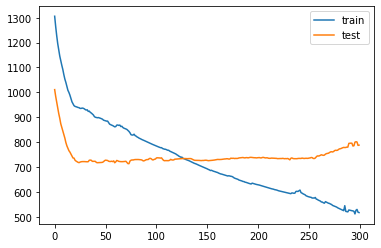

In [ ]:
# random set function to get the same results every time
reset_random_seeds()
# design network weekly
model = Sequential()
#inputshape is using time stamps , feautures
model.add(LSTM(32,activation="relu" ,return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=300, batch_size=258, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.show()


In [ ]:
history.history['loss']
test_X.shape

(55, 1, 109)

In [ ]:
yhat = model.predict(test_X)
yhat=yhat.reshape(yhat.shape[0],)
yhat.shape

(55,)

In [ ]:
yhat

array([ 1.3773314e+03,  2.5850314e+02,  6.0721136e+02,  6.4240564e+02,
        8.2368909e+02,  3.1926224e+02,  2.3762616e+02,  1.0288180e+03,
       -1.1816369e+02,  3.1382681e+02,  2.4989841e+02,  2.3974136e+01,
        1.8908626e+02,  1.1040676e+03,  2.4710477e+02,  1.1402964e+03,
        9.4214520e+02,  1.3188197e+03,  6.3692316e+02,  1.9422850e+02,
        3.9730820e+02,  1.0957963e+03,  5.5765741e+02,  1.9303683e+02,
        4.0616574e+02,  2.3665176e+02, -6.2461948e+01,  1.1107589e+03,
       -2.4112152e+02,  2.3761477e+03, -3.7524077e-01,  1.3650736e+03,
        1.7953296e+03,  2.2631924e+02,  2.3002139e+03,  1.9281455e+03,
        9.3881470e+02,  1.2345166e+03,  1.6691904e+03,  1.5219357e+03,
        2.9820911e+03,  1.5397305e+03,  1.2358990e+03,  1.9131265e+03,
        9.8603851e+02,  1.3589341e+03,  1.4976016e+03,  5.9061566e+02,
        1.2570190e+03,  1.9070166e+02,  1.3495659e+03,  1.4691777e+03,
        1.3203711e+03,  1.2770673e+03,  2.4366794e+03], dtype=float32)

In [ ]:
yhat_df = pd.DataFrame(data = yhat, index = test_set_weekly_multi["individuals"][:len(yhat)].index, columns = ["predicted"])
yhat_df["predicted"]= yhat_df["predicted"].apply(lambda x : x if x > 0 else 0)
yhat_df

,predicted
Date,
2020-09-13,1377.331421
2020-09-20,258.503143
2020-09-27,607.211365
2020-10-04,642.405640
2020-10-11,823.689087
2020-10-18,319.262238
2020-10-25,237.626160
2020-11-01,1028.817993
2020-11-08,0.000000


<AxesSubplot:xlabel='Date', ylabel='individuals'>

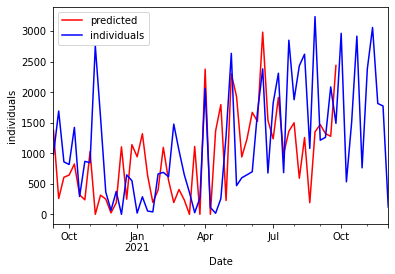

In [ ]:
yhat_df[:].plot(color = "red" , ylabel= "individuals")
test_set_weekly_multi["individuals"][:].plot(color = "blue", legend = "test")

In [ ]:
print(sqrt(mean_squared_error(yhat_df["predicted"][:2], test_set_weekly_multi["individuals"][:2])))
print(mean_absolute_error(yhat_df["predicted"][:2], test_set_weekly_multi["individuals"][:2]))

1198.0237894132154
1019.060453414917


In [ ]:
train_set_daily_multi

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,individuals
Date,,,,,,,,,,,,,,,,,,,
2015-10-01,0.636405,0.779438,0.780186,0.714930,0.355869,0.569968,0.674951,0.519894,0.256390,0.374302,0.049700,0.471068,0.428617,0.258517,0.390736,0.046628,0.491964,0.416957,343
2015-10-02,0.598540,0.805254,0.773994,0.685070,0.083952,0.467043,0.711014,0.557029,0.097444,0.167598,0.114824,0.168704,0.454596,0.103540,0.189430,0.093257,0.209644,0.394769,0
2015-10-03,0.611314,0.857337,0.810114,0.703099,0.213224,0.519210,0.698343,0.623342,0.264377,0.314246,0.284490,0.177669,0.208875,0.259185,0.315914,0.281205,0.175402,0.192151,128
2015-10-04,0.628193,0.892663,0.840041,0.709859,0.150817,0.516391,0.735380,0.668435,0.130990,0.131285,0.109683,0.131214,0.522332,0.126921,0.128266,0.098278,0.132075,0.509588,62
2015-10-05,0.643248,0.775815,0.781734,0.713803,0.211738,0.534720,0.720760,0.620690,0.078275,0.090084,0.056555,0.133659,0.726121,0.073480,0.074228,0.053085,0.113208,0.722257,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-05,0.778741,0.918478,0.939628,0.872113,0.412333,0.707790,0.828460,0.488064,0.579073,0.722765,0.475578,0.474328,0.298579,0.584502,0.713183,0.515065,0.414396,0.284990,22
2020-09-06,0.816606,0.883152,0.941176,0.888451,0.590639,0.791681,0.827485,0.381963,0.325879,0.567039,0.048843,0.696822,0.383779,0.329993,0.561164,0.043042,0.696716,0.364379,15
2020-09-07,0.738139,0.960598,0.940660,0.843944,0.179049,0.599225,0.831384,0.437666,0.279553,0.270251,0.269066,0.142624,0.646936,0.269205,0.245249,0.271162,0.102725,0.636903,0


# Daily LSTM


Epoch 1/300
7/7 - 1s - loss: 216.6049 - val_loss: 167.5329
Epoch 2/300
7/7 - 0s - loss: 214.4953 - val_loss: 165.7847
Epoch 3/300
7/7 - 0s - loss: 212.7650 - val_loss: 164.1153
Epoch 4/300
7/7 - 0s - loss: 210.8875 - val_loss: 162.4301
Epoch 5/300
7/7 - 0s - loss: 209.0972 - val_loss: 160.8643
Epoch 6/300
7/7 - 0s - loss: 207.5550 - val_loss: 159.0268
Epoch 7/300
7/7 - 0s - loss: 206.2142 - val_loss: 157.2812
Epoch 8/300
7/7 - 0s - loss: 204.9708 - val_loss: 155.4900
Epoch 9/300
7/7 - 0s - loss: 203.8405 - val_loss: 153.9553
Epoch 10/300
7/7 - 0s - loss: 202.7008 - val_loss: 152.6546
Epoch 11/300
7/7 - 0s - loss: 201.7028 - val_loss: 151.4908
Epoch 12/300
7/7 - 0s - loss: 200.6944 - val_loss: 149.8136
Epoch 13/300
7/7 - 0s - loss: 199.6013 - val_loss: 148.2991
Epoch 14/300
7/7 - 0s - loss: 198.5404 - val_loss: 147.0497
Epoch 15/300
7/7 - 0s - loss: 197.5301 - val_loss: 145.7727
Epoch 16/300
7/7 - 0s - loss: 196.5291 - val_loss: 144.1182
Epoch 17/300
7/7 - 0s - loss: 195.4923 - val_loss

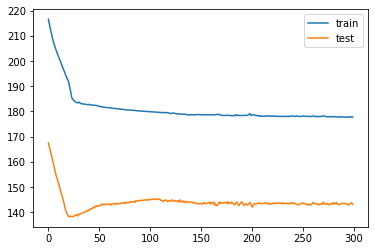

In [ ]:

reset_random_seeds()
model = Sequential()
model.add(LSTM(32,activation="relu",return_sequences=True,input_shape=(train_X_d.shape[1], train_X_d.shape[2])))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
# fit network
history = model.fit(train_X_d, train_y_d, epochs=300, batch_size=1806, validation_data=(test_X_d, test_y_d), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.show()

In [ ]:
yhat = model.predict(test_X_d)
yhat=yhat.reshape(yhat.shape[0],)
yhat_df = pd.DataFrame(data = yhat, index = test_set_daily_multi["individuals"][:len(yhat)].index, columns = ["predicted"])
yhat_df["predicted"] = yhat_df["predicted"].apply(lambda x : x if x > 0 else 0)
yhat_df


,predicted
Date,
2020-09-10,96.516541
2020-09-11,34.797634
2020-09-12,55.648354
2020-09-13,118.712074
2020-09-14,0.000000
...,...
2021-11-30,0.477613
2021-12-01,5.153898
2021-12-02,17.080385


<AxesSubplot:xlabel='Date'>

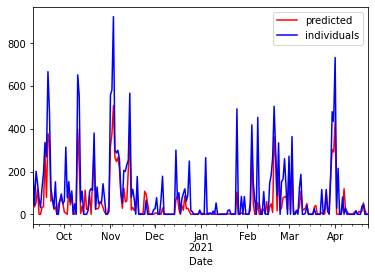

In [ ]:
yhat_df[:226].plot(color = "red" , legend = True)
test_set_daily_multi["individuals"][:226].plot(color = "blue", legend = "test")

In [ ]:
print(sqrt(mean_squared_error(yhat_df["predicted"][:2], test_set_daily_multi["individuals"][:2])))
print(mean_absolute_error(yhat_df["predicted"][:2], test_set_daily_multi["individuals"][:2]))

77.33692520394123
58.342912673950195


In [ ]:
#from keras.layers import Bidirectional

Epoch 1/1500
1/1 - 1s - loss: 6345.9395 - val_loss: 5136.1821
Epoch 2/1500
1/1 - 0s - loss: 6343.0913 - val_loss: 5133.4536
Epoch 3/1500
1/1 - 0s - loss: 6340.2617 - val_loss: 5130.7192
Epoch 4/1500
1/1 - 0s - loss: 6337.4263 - val_loss: 5127.9526
Epoch 5/1500
1/1 - 0s - loss: 6334.5610 - val_loss: 5125.1396
Epoch 6/1500
1/1 - 0s - loss: 6331.6440 - val_loss: 5122.2554
Epoch 7/1500
1/1 - 0s - loss: 6328.6519 - val_loss: 5119.2710
Epoch 8/1500
1/1 - 0s - loss: 6325.5630 - val_loss: 5116.1553
Epoch 9/1500
1/1 - 0s - loss: 6322.3433 - val_loss: 5112.8804
Epoch 10/1500
1/1 - 0s - loss: 6318.9639 - val_loss: 5109.4238
Epoch 11/1500
1/1 - 0s - loss: 6315.4019 - val_loss: 5105.7627
Epoch 12/1500
1/1 - 0s - loss: 6311.6353 - val_loss: 5101.8730
Epoch 13/1500
1/1 - 0s - loss: 6307.6367 - val_loss: 5097.7280
Epoch 14/1500
1/1 - 0s - loss: 6303.3774 - val_loss: 5093.3018
Epoch 15/1500
1/1 - 0s - loss: 6298.8232 - val_loss: 5088.5645
Epoch 16/1500
1/1 - 0s - loss: 6294.0498 - val_loss: 5083.4912
E

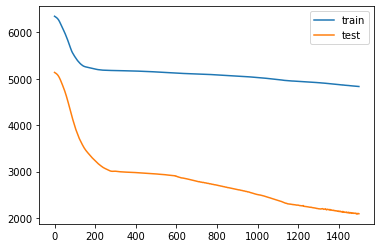

In [ ]:
# design network
reset_random_seeds()
model = Sequential()
model.add(LSTM(64,activation="relu", return_sequences=True,input_shape=(train_X_m.shape[1], train_X_m.shape[2])))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
# fit network
history = model.fit(train_X_m, train_y_m, epochs=300, batch_size=59, validation_data=(test_X_m, test_y_m), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.show()

# Monthly LSTM

In [ ]:
yhat = model.predict(test_X_m)
yhat=yhat.reshape(yhat.shape[0],)
yhat_df = pd.DataFrame(data = yhat, index = test_set_monthly_multi["individuals"][:len(yhat)].index, columns = ["predicted"])
yhat_df["predicted"] = yhat_df["predicted"].apply(lambda x : x if x > 0 else 0)
yhat_df

,predicted
Date,
2020-09-30,4040.699463
2020-10-31,4582.791992
2020-11-30,4873.686035
2020-12-31,1770.742554
2021-01-31,941.543823
2021-02-28,4104.433594
2021-03-31,4103.488281
2021-04-30,3698.419922
2021-05-31,3825.627441


<AxesSubplot:xlabel='Date'>

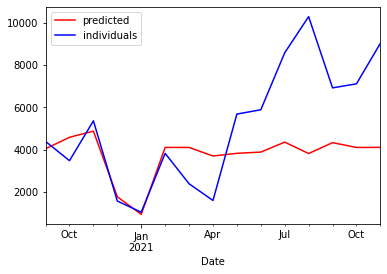

In [ ]:
yhat_df[:].plot(color = "red")
test_set_monthly_multi["individuals"][:].plot(color = "blue", legend = "test")


In [ ]:
print(sqrt(mean_squared_error(yhat_df["predicted"][:2], test_set_monthly_multi["individuals"][:2])))
print(mean_absolute_error(yhat_df["predicted"][:2], test_set_monthly_multi["individuals"][:2]))

818.9731375326055
726.0462646484375


train_size = int(len(combined_df_w_diff) * 0.8)
test_size = len(combined_df_w_diff)-train_size
train, test = combined_df_w_diff.iloc[0:train_size], combined_df_w_diff.iloc[train_size:len(combined_df_w_diff)]
print(len(train),len(test))

# GRU Modell

Epoch 1/200
1/1 - 1s - loss: 1333.7405 - val_loss: 1061.5461
Epoch 2/200
1/1 - 0s - loss: 1323.7656 - val_loss: 1040.6565
Epoch 3/200
1/1 - 0s - loss: 1312.5045 - val_loss: 1028.5995
Epoch 4/200
1/1 - 0s - loss: 1301.8824 - val_loss: 1016.8895
Epoch 5/200
1/1 - 0s - loss: 1292.8093 - val_loss: 1003.1661
Epoch 6/200
1/1 - 0s - loss: 1285.1545 - val_loss: 991.5482
Epoch 7/200
1/1 - 0s - loss: 1277.7986 - val_loss: 982.2712
Epoch 8/200
1/1 - 0s - loss: 1271.4701 - val_loss: 972.9243
Epoch 9/200
1/1 - 0s - loss: 1266.4103 - val_loss: 963.7020
Epoch 10/200
1/1 - 0s - loss: 1261.4895 - val_loss: 955.9263
Epoch 11/200
1/1 - 0s - loss: 1257.0463 - val_loss: 947.3113
Epoch 12/200
1/1 - 0s - loss: 1253.2911 - val_loss: 937.4311
Epoch 13/200
1/1 - 0s - loss: 1249.5515 - val_loss: 926.4692
Epoch 14/200
1/1 - 0s - loss: 1245.7860 - val_loss: 916.8192
Epoch 15/200
1/1 - 0s - loss: 1242.4088 - val_loss: 910.0407
Epoch 16/200
1/1 - 0s - loss: 1239.7389 - val_loss: 904.7825
Epoch 17/200
1/1 - 0s - loss

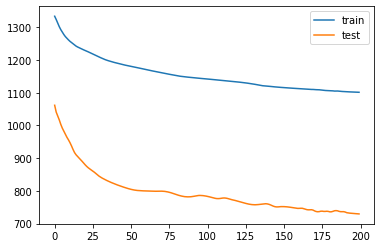

In [ ]:
# random set function to get the same results every time
reset_random_seeds()
# design network weekly
model = Sequential()
#inputshape is using time stamps , feautures
model.add(GRU(64,activation="relu",return_sequences=True,input_shape=(1, 19)))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=258, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.show()

<AxesSubplot:xlabel='Date'>

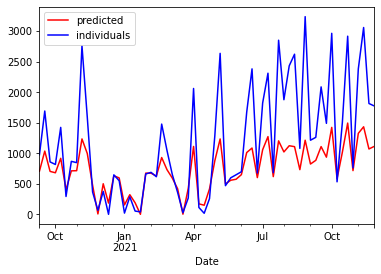

In [ ]:
yhat = model.predict(test_X)
yhat=yhat.reshape(yhat.shape[0],)
yhat_df = pd.DataFrame(data = yhat, index = test_set_weekly_multi["individuals"][:len(yhat)].index, columns = ["predicted"])
yhat_df["predicted"]= yhat_df["predicted"].apply(lambda x : x if x > 0 else 0)
yhat_df[:].plot(color = "red" )
test_set_weekly_multi["individuals"][:len(yhat_df)].plot(color = "blue", legend = "test")

In [ ]:
print(sqrt(mean_squared_error(yhat_df["predicted"][:], test_set_weekly_multi["individuals"][:len(yhat_df)])))
print(mean_absolute_error(yhat_df["predicted"][:], test_set_weekly_multi["individuals"][:len(yhat_df)]))

724.2775711010248
486.6684731952846


# GRU Daily

Epoch 1/500
1/1 - 1s - loss: 216.4580 - val_loss: 166.2386
Epoch 2/500
1/1 - 0s - loss: 206.6135 - val_loss: 161.8614
Epoch 3/500
1/1 - 0s - loss: 204.4298 - val_loss: 158.2724
Epoch 4/500
1/1 - 0s - loss: 202.6905 - val_loss: 155.1734
Epoch 5/500
1/1 - 0s - loss: 201.1665 - val_loss: 152.5493
Epoch 6/500
1/1 - 0s - loss: 199.6410 - val_loss: 150.1521
Epoch 7/500
1/1 - 0s - loss: 198.0409 - val_loss: 148.0653
Epoch 8/500
1/1 - 0s - loss: 196.3824 - val_loss: 146.2631
Epoch 9/500
1/1 - 0s - loss: 194.6766 - val_loss: 144.6414
Epoch 10/500
1/1 - 0s - loss: 192.9643 - val_loss: 143.2390
Epoch 11/500
1/1 - 0s - loss: 191.2905 - val_loss: 142.4489
Epoch 12/500
1/1 - 0s - loss: 189.8283 - val_loss: 142.1922
Epoch 13/500
1/1 - 0s - loss: 189.1818 - val_loss: 141.6978
Epoch 14/500
1/1 - 0s - loss: 188.4287 - val_loss: 140.9246
Epoch 15/500
1/1 - 0s - loss: 187.5253 - val_loss: 139.9927
Epoch 16/500
1/1 - 0s - loss: 186.4882 - val_loss: 139.1798
Epoch 17/500
1/1 - 0s - loss: 185.6039 - val_loss

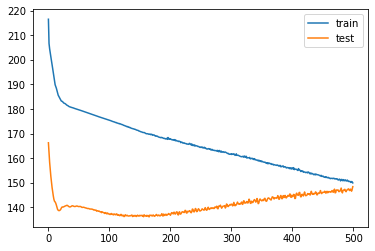

In [ ]:
# random set function to get the same results every time
reset_random_seeds()
# design network weekly
model = Sequential()
#inputshape is using time stamps , feautures
model.add(GRU(600,activation="relu",dropout=0.0,return_sequences=True,input_shape=(train_X_d.shape[1], train_X_d.shape[2])))
#model.add(Dense(20))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
# fit network
history = model.fit(train_X_d, train_y_d, epochs=500, batch_size=1806, validation_data=(test_X_d, test_y_d), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.show()

<AxesSubplot:xlabel='Date'>

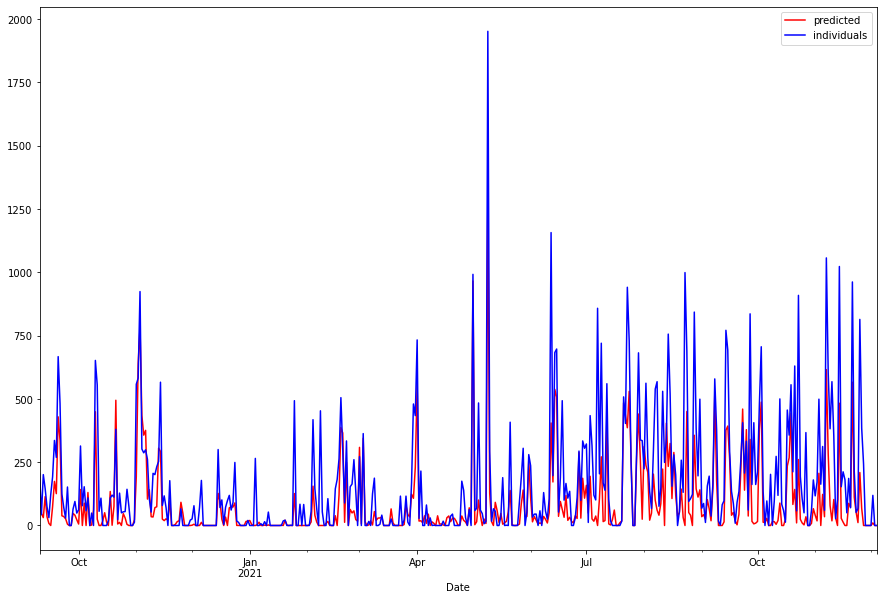

In [ ]:
yhat = model.predict(test_X_d)
yhat=yhat.reshape(yhat.shape[0],)
yhat_df = pd.DataFrame(data = yhat, index = test_set_daily_multi["individuals"][:len(yhat)].index, columns = ["predicted"])
yhat_df["predicted"]= yhat_df["predicted"].apply(lambda x : x if x > 0 else 0)
yhat_df[:].plot(color = "red" ,figsize= (15,10))
test_set_daily_multi["individuals"][:len(yhat_df)].plot(color = "blue", legend = "test")

In [ ]:
print(sqrt(mean_squared_error(yhat_df["predicted"][:], test_set_daily_multi["individuals"][:len(yhat_df)])))
print(mean_absolute_error(yhat_df["predicted"][:], test_set_daily_multi["individuals"][:len(yhat_df)]))

216.9769573019218
122.82018461683869


# GRU Monthly

Epoch 1/1000
6/6 - 1s - loss: 6316.1523 - val_loss: 5075.5005
Epoch 2/1000
6/6 - 0s - loss: 6253.1206 - val_loss: 5000.6064
Epoch 3/1000
6/6 - 0s - loss: 6168.4233 - val_loss: 4891.4316
Epoch 4/1000
6/6 - 0s - loss: 6065.4653 - val_loss: 4738.6938
Epoch 5/1000
6/6 - 0s - loss: 5934.2925 - val_loss: 4531.1528
Epoch 6/1000
6/6 - 0s - loss: 5770.1230 - val_loss: 4276.2817
Epoch 7/1000
6/6 - 0s - loss: 5607.3848 - val_loss: 4035.4385
Epoch 8/1000
6/6 - 0s - loss: 5496.1226 - val_loss: 3821.0317
Epoch 9/1000
6/6 - 0s - loss: 5410.3833 - val_loss: 3657.1265
Epoch 10/1000
6/6 - 0s - loss: 5346.0176 - val_loss: 3533.4893
Epoch 11/1000
6/6 - 0s - loss: 5304.3145 - val_loss: 3443.0791
Epoch 12/1000
6/6 - 0s - loss: 5278.7617 - val_loss: 3379.2036
Epoch 13/1000
6/6 - 0s - loss: 5262.5259 - val_loss: 3328.3938
Epoch 14/1000
6/6 - 0s - loss: 5250.8789 - val_loss: 3289.7625
Epoch 15/1000
6/6 - 0s - loss: 5241.5586 - val_loss: 3258.9209
Epoch 16/1000
6/6 - 0s - loss: 5233.4424 - val_loss: 3229.2837
E

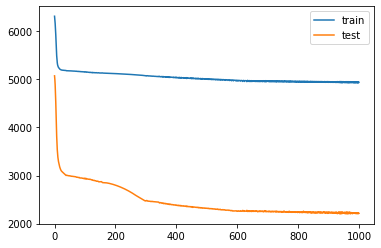

In [ ]:
# random set function to get the same results every time
reset_random_seeds()
# design network weekly
model = Sequential()
#inputshape is using time stamps , feautures
model.add(GRU(600,activation="relu",return_sequences=True,input_shape=(1, 9)))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
# fit network
history = model.fit(train_X_m, train_y_m, epochs=1000, batch_size=10, validation_data=(test_X_m, test_y_m), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.show()

<AxesSubplot:xlabel='Date'>

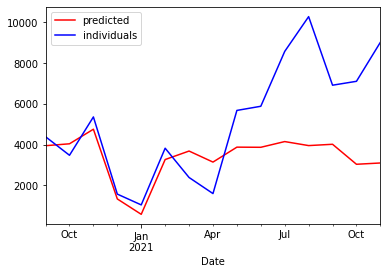

In [ ]:
yhat = model.predict(test_X_m)
yhat=yhat.reshape(yhat.shape[0],)
yhat_df = pd.DataFrame(data = yhat, index = test_set_monthly_multi["individuals"][:len(yhat)].index, columns = ["predicted"])
yhat_df["predicted"]= yhat_df["predicted"].apply(lambda x : x if x > 0 else 0)
yhat_df[:].plot(color = "red" )
test_set_monthly_multi["individuals"][:].plot(color = "blue", legend = "test")

In [ ]:
print(sqrt(mean_squared_error(yhat_df["predicted"][:8], test_set_monthly_multi["individuals"][:8])))
print(mean_absolute_error(yhat_df["predicted"][:8], test_set_monthly_multi["individuals"][:8]))

831.531719178529
713.7281036376953


In [ ]:
train_set_daily_multi.shape

(1806, 19)

In [ ]:
train_set_monthly_multi.shape

(59, 19)

In [ ]:
train_set_weekly_multi.shape

(258, 19)